<a href="https://colab.research.google.com/github/chavan-sanvi/21BDS0166/blob/main/21BDS0166.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# EDA DIGITAL ASSIGNMENT 1
# Name: Sanvi Chavan
# Roll No.: 21BDS0166
# Github Link: https://github.com/chavan-sanvi/21BDS0166
# Dataset Name: bank.csv



# Import necessary libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


In [ ]:

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank.csv"
df = pd.read_csv(url)

# Display first few rows
print(df.head())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [ ]:
# Explore Dimension
print("\nDataset Dimensions (Rows, Columns):")
print(df.shape)  # (number of rows, number of columns)

# Summary of Dataset
print("\nSummary of Dataset:")
print(df.info())  # Data types and non-null values

print("\nStatistical Summary (Numerical Columns):")
print(df.describe())  # Summary statistics for numerical data

print("\nStatistical Summary (Categorical Columns):")
print(df.describe(include='object'))  # Summary for categorical data




Dataset Dimensions (Rows, Columns):
(11162, 17)

Summary of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None

Statistical Summary (Nu

In [ ]:
# Data Handling

# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Check for missing values
print("Missing Values Before Cleaning:\n", df.isnull().sum())

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# Data Cleaning

# Handling Missing Values
num_imputer = SimpleImputer(strategy="mean")  # Fill numerical columns with mean
cat_imputer = SimpleImputer(strategy="most_frequent")  # Fill categorical columns with mode

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Verify missing values after cleaning
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Remove unnecessary white spaces from categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())

# Display dataset info after cleaning
print("\nDataset Information After Cleaning:")
print(df.info())

# Display first 5 rows after cleaning
print("\nCleaned Dataset Preview:")
print(df.head())

Missing Values Before Cleaning:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Missing Values After Cleaning:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default

In [ ]:
# Univariate Analysis with detailed statistical output for numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Iterate over each numeric column to display detailed statistics
for col in numeric_columns:
    print(f"\n--- Univariate Analysis for: {col} 21BDS0166---")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")

    print(f"Mode: {df[col].mode()[0]}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"25th Percentile: {df[col].quantile(0.25)}")
    print(f"75th Percentile: {df[col].quantile(0.75)}")


--- Univariate Analysis for: age 21BDS0166---
Mean: 41.231947679627304
Median: 39.0
Mode: 31.0
Standard Deviation: 11.913369192215445
Min: 18.0
Max: 95.0
25th Percentile: 32.0
75th Percentile: 49.0

--- Univariate Analysis for: balance 21BDS0166---
Mean: 1528.5385235620856
Median: 550.0
Mode: 0.0
Standard Deviation: 3225.4133259461923
Min: -6847.0
Max: 81204.0
25th Percentile: 122.0
75th Percentile: 1708.0

--- Univariate Analysis for: day 21BDS0166---
Mean: 15.658036194230425
Median: 15.0
Mode: 20.0
Standard Deviation: 8.420739541006434
Min: 1.0
Max: 31.0
25th Percentile: 8.0
75th Percentile: 22.0

--- Univariate Analysis for: duration 21BDS0166---
Mean: 371.99381831213043
Median: 255.0
Mode: 97.0
Standard Deviation: 347.1283857163069
Min: 2.0
Max: 3881.0
25th Percentile: 138.0
75th Percentile: 496.0

--- Univariate Analysis for: campaign 21BDS0166---
Mean: 2.508421429851281
Median: 2.0
Mode: 1.0
Standard Deviation: 2.722077181661534
Min: 1.0
Max: 63.0
25th Percentile: 1.0
75th Perce

Univariate Analysis for age:


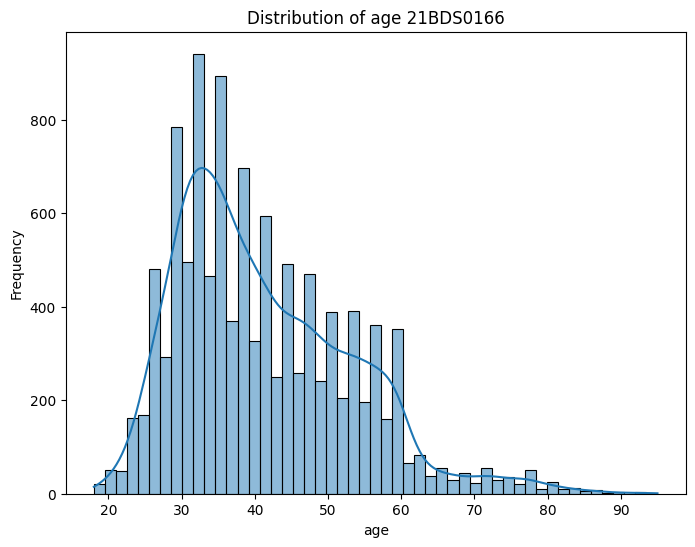

Univariate Analysis for duration:


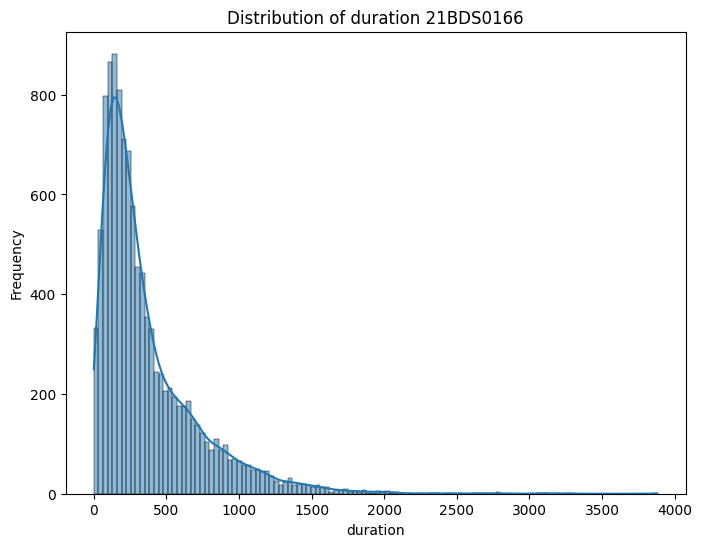

In [ ]:
# Univariate Analysis

# Numerical Features

selected_cols = ['age', 'duration']  # Specify the columns to analyze

for col in selected_cols:
    print(f"Univariate Analysis for {col}:")

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} 21BDS0166')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



Univariate Analysis for age:


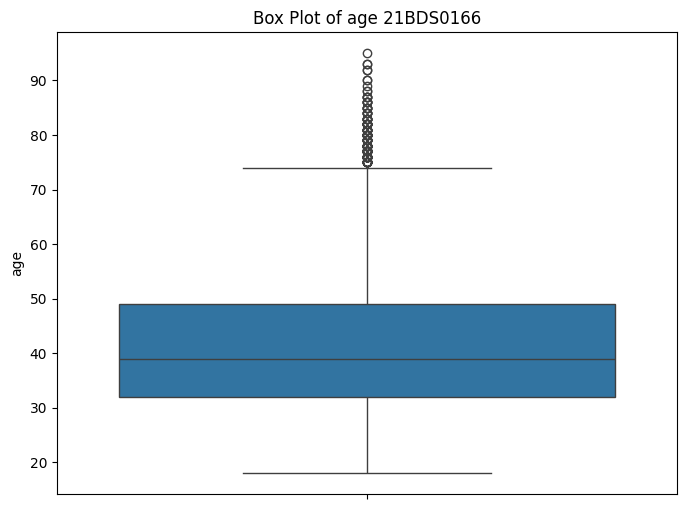

Univariate Analysis for balance:


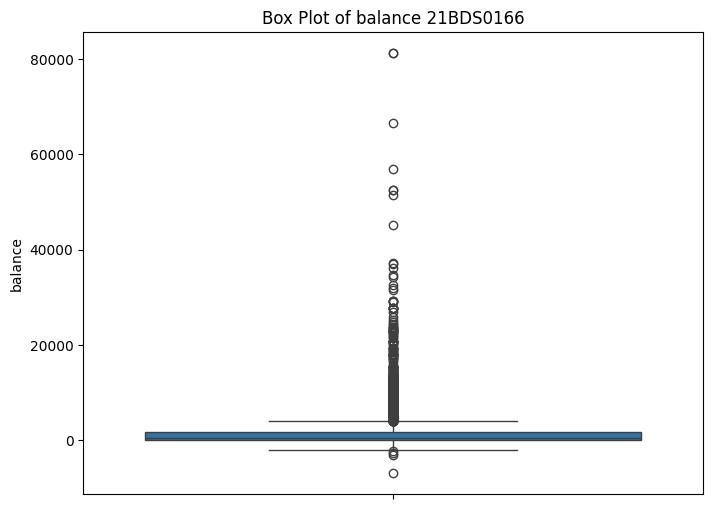

In [ ]:
# Univariate Analysis
# Numerical Features

selected_cols = ['age', 'balance']

for col in selected_cols:
    print(f"Univariate Analysis for {col}:")

    # Box Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} 21BDS0166')
    plt.ylabel(col)
    plt.show()

Univariate Analysis for job:


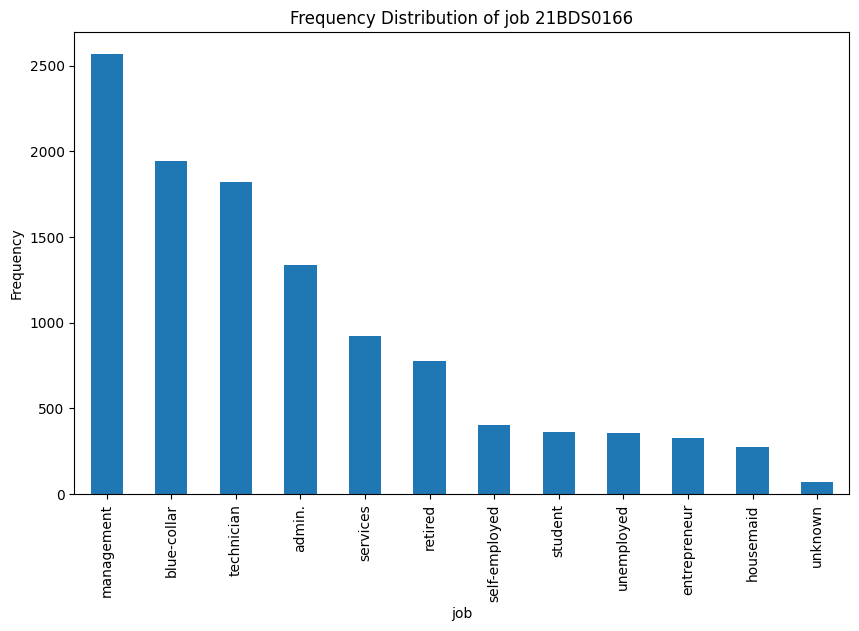

Univariate Analysis for month:


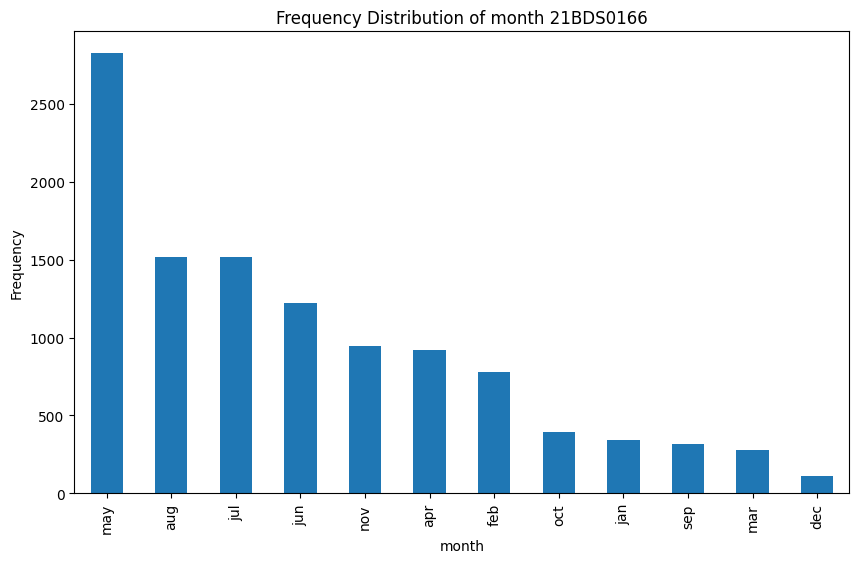

In [ ]:
# Univariate Analysis
# Categorical Features

selected_cat_cols = ['job', 'month']


for col in selected_cat_cols:
    print(f"Univariate Analysis for {col}:")

    # Bar Plot
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {col} 21BDS0166')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Univariate Analysis for job:


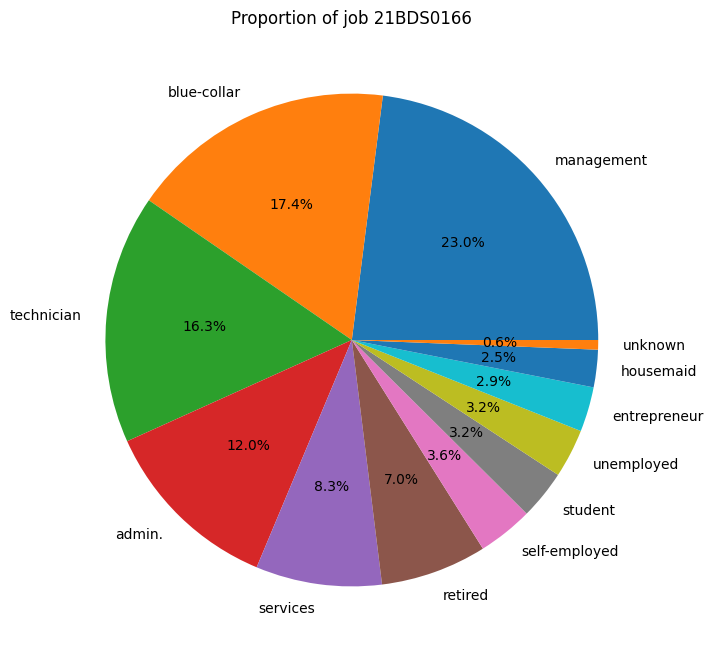

Univariate Analysis for poutcome:


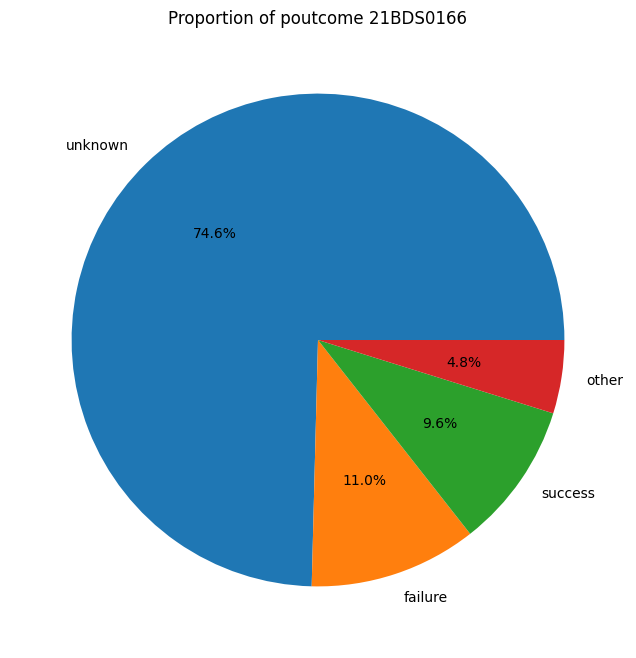

In [ ]:
# Univariate Analysis
# Categorical Features

# Univariate Analysis
# Categorical Features - Pie Charts for Selected Columns

selected_cat_cols = ['job', 'poutcome']

for col in selected_cat_cols:
    print(f"Univariate Analysis for {col}:")

    # Pie Chart
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Proportion of {col} 21BDS0166')
    plt.ylabel('')  # Remove the y-label
    plt.show()

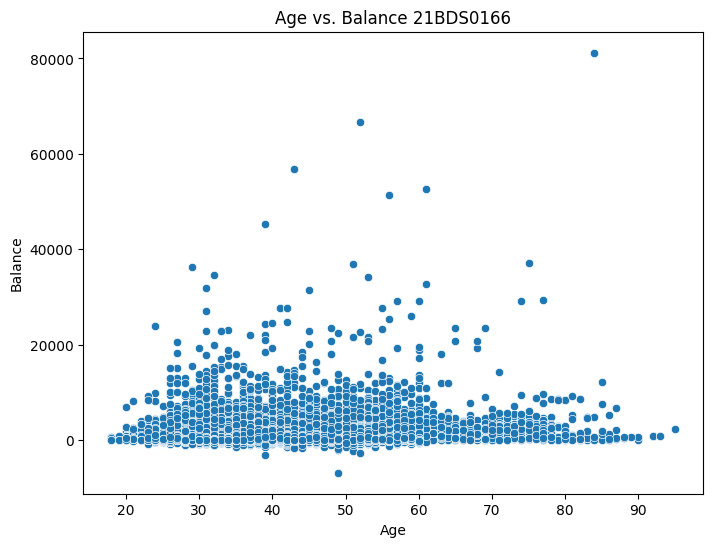

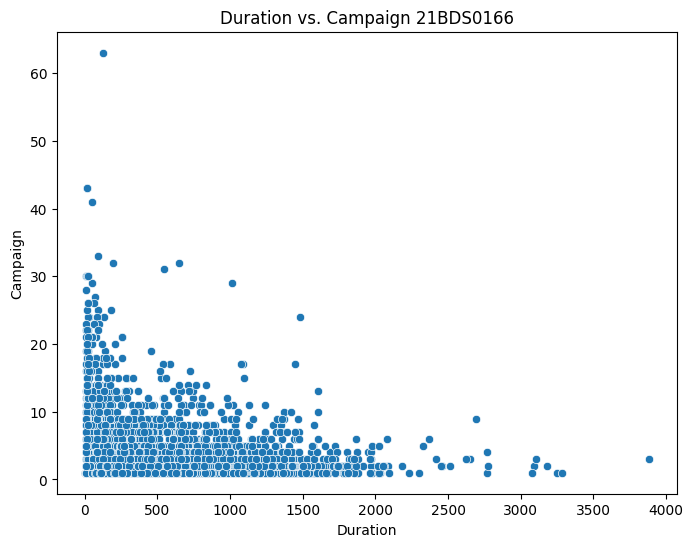

In [ ]:
# Bivariate Analysis

# Numerical vs. Numerical
# Scatterplot - Two Selected Comparisons

# First scatterplot: 'age' vs. 'balance'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['balance'])  # Selecting 'age' and 'balance'
plt.title('Age vs. Balance 21BDS0166')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

# Second scatterplot: 'duration' vs. 'campaign'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['duration'], y=df['campaign'])  # Selecting 'duration' and 'campaign'
plt.title('Duration vs. Campaign 21BDS0166')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.show()

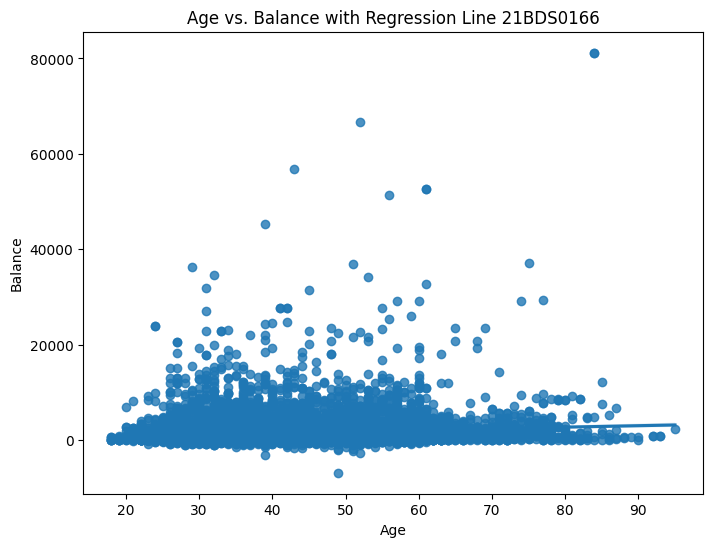

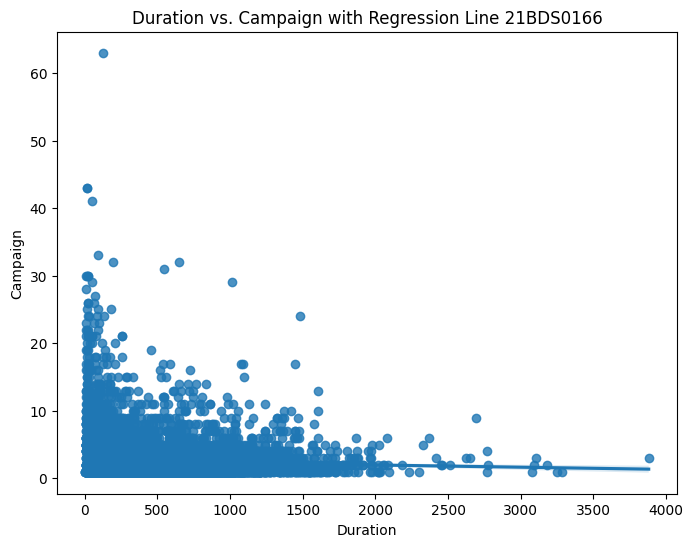

In [ ]:
# Bivariate Analysis
# Numerical vs. Numerical

# First Regression Plot: 'age' vs. 'balance'
plt.figure(figsize=(8, 6))
sns.regplot(x=df['age'], y=df['balance'])
plt.title('Age vs. Balance with Regression Line 21BDS0166')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

# Second Regression Plot: 'duration' vs. 'campaign'
plt.figure(figsize=(8, 6))
sns.regplot(x=df['duration'], y=df['campaign'])
plt.title('Duration vs. Campaign with Regression Line 21BDS0166')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.show()

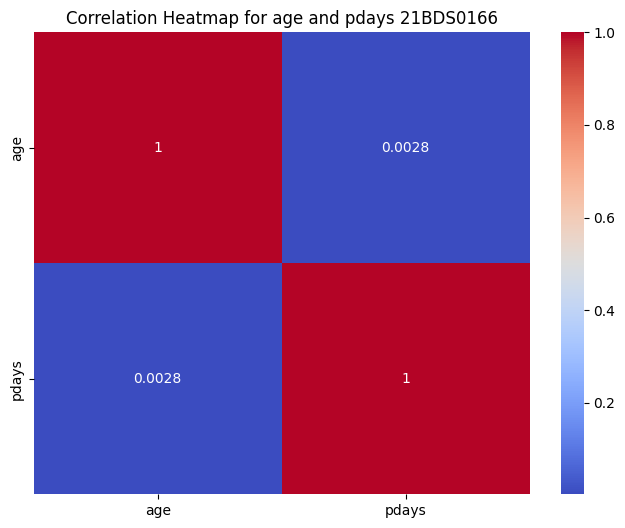

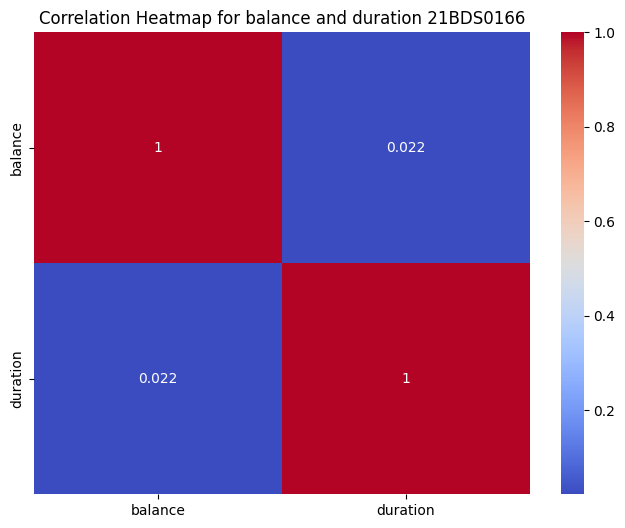

In [ ]:
# Bivariate Analysis
# Numerical vs. Numerical

selected_num_cols = [['age', 'pdays'], ['balance', 'duration']]

for cols_pair in selected_num_cols:
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[cols_pair].corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {cols_pair[0]} and {cols_pair[1]} 21BDS0166')
    plt.show()

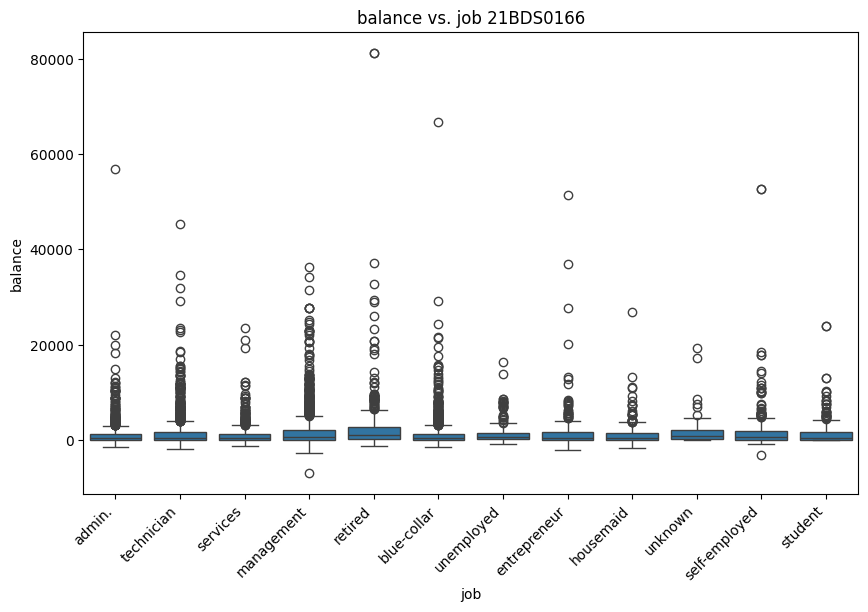

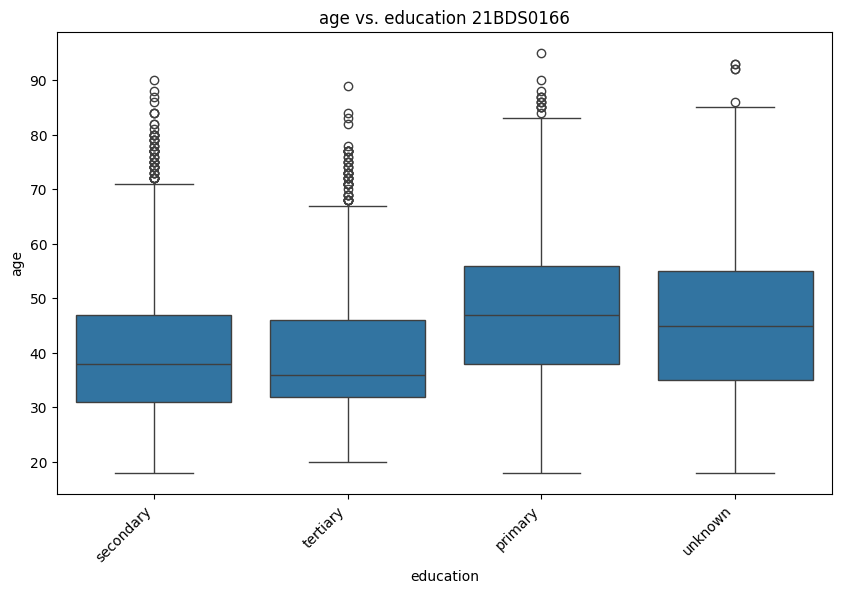

In [ ]:
# Bivariate Analysis
# Numerical vs. Categorical
# Boxplot

num_cols_to_plot = ['balance', 'age']
cat_cols_to_plot = ['job', 'education']

for i in range(2):  # Loop to create 2 plots
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[cat_cols_to_plot[i]], y=df[num_cols_to_plot[i]])
    plt.title(f'{num_cols_to_plot[i]} vs. {cat_cols_to_plot[i]} 21BDS0166')
    plt.xticks(rotation=45, ha='right')
    plt.show()

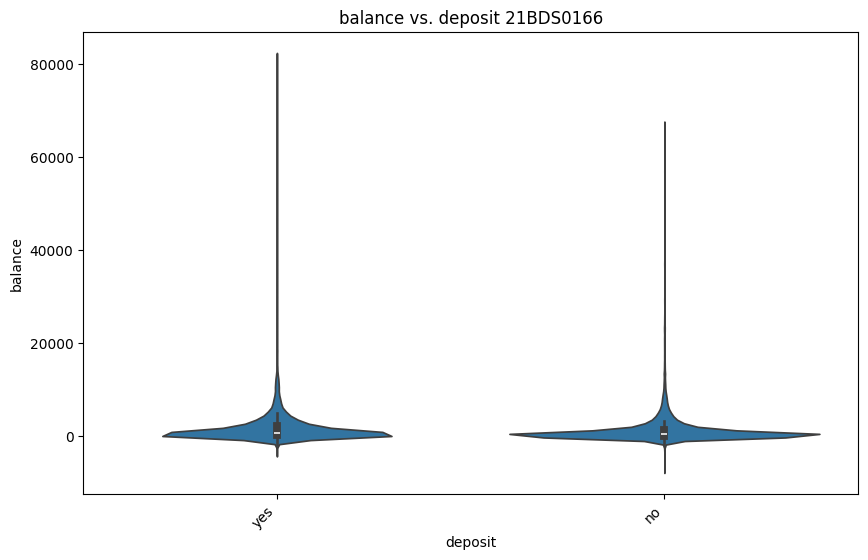

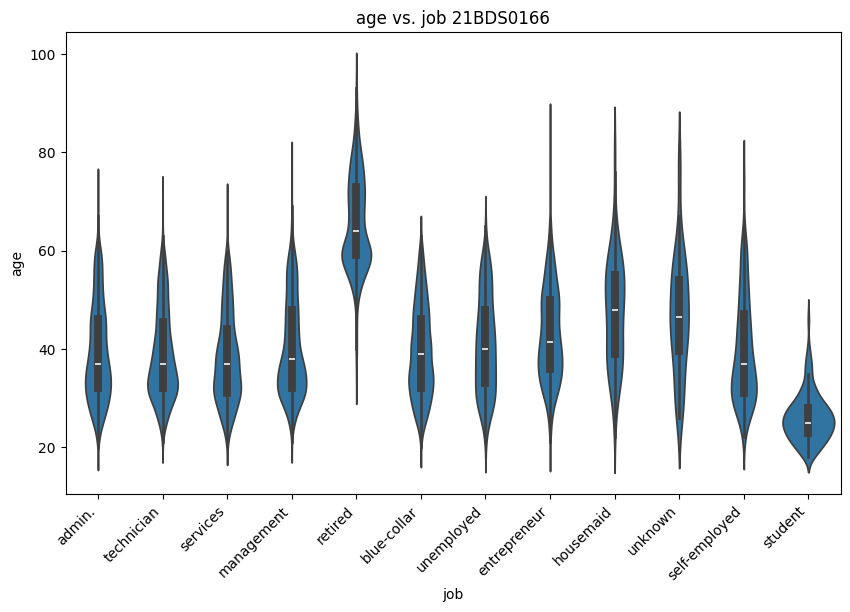

In [ ]:
# Bivariate Analysis
# Numerical vs. Categorical
# Violin Plot

# Select specific columns for the two violin plots
selected_num_cols = ['balance', 'age']
selected_cat_cols = ['deposit', 'job']

# Create the two violin plots
for i in range(2):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df[selected_cat_cols[i]], y=df[selected_num_cols[i]])
    plt.title(f'{selected_num_cols[i]} vs. {selected_cat_cols[i]} 21BDS0166')
    plt.xticks(rotation=45, ha='right')
    plt.show()

<Figure size 1000x600 with 0 Axes>

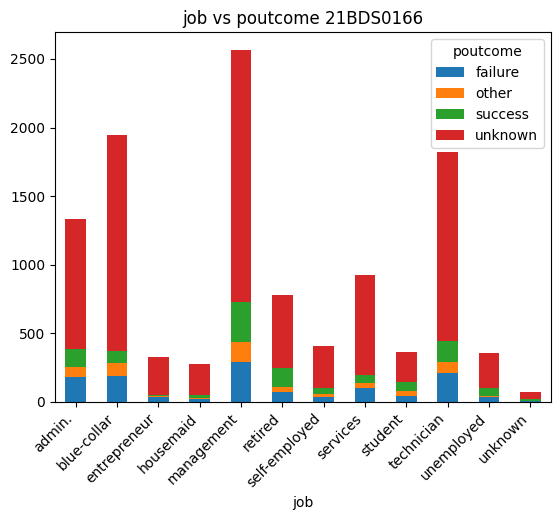

<Figure size 1000x600 with 0 Axes>

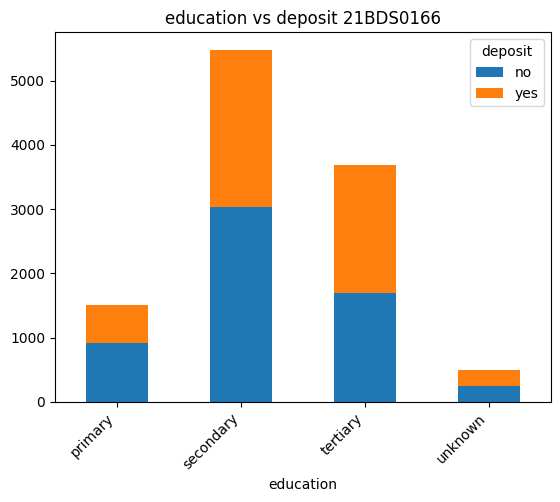

In [ ]:
# Bivariate Analysis
# Categorical vs. Categorical

cat_cols_pairs = [['job', 'poutcome'], ['education', 'deposit']]

for col_pair in cat_cols_pairs:
    plt.figure(figsize=(10, 6))
    pd.crosstab(df[col_pair[0]], df[col_pair[1]]).plot(kind="bar", stacked=True)
    plt.title(f'{col_pair[0]} vs {col_pair[1]} 21BDS0166')
    plt.xticks(rotation=45, ha="right")
    plt.show()

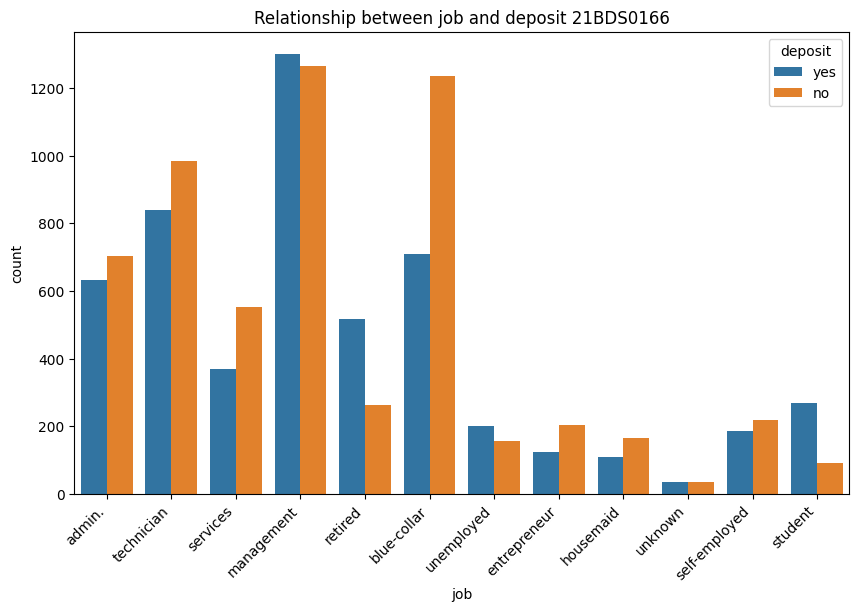

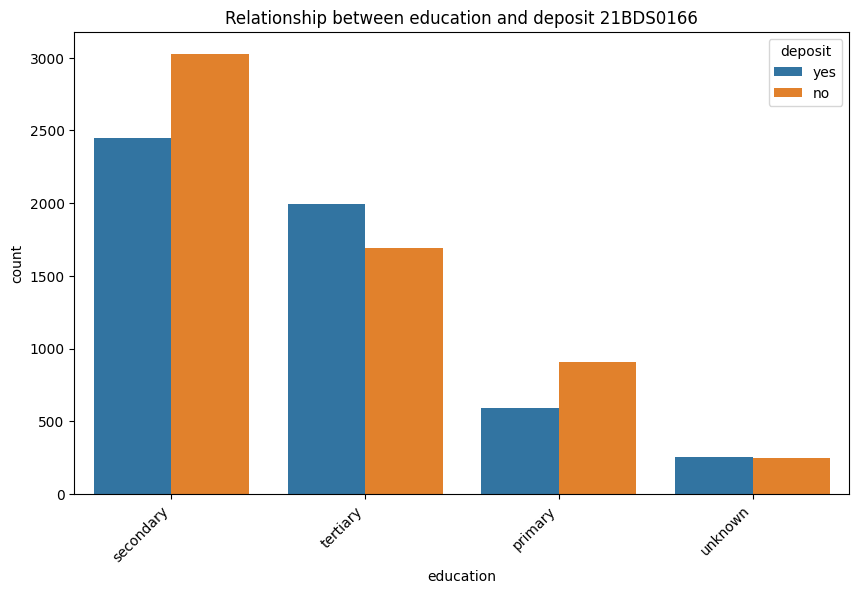

In [ ]:
# Bivariate Analysis
# Categorical vs. Categorical

insightful_pairs = [['job', 'deposit'], ['education', 'deposit']]

for col_pair in insightful_pairs:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col_pair[0], hue=col_pair[1], data=df)
    plt.title(f'Relationship between {col_pair[0]} and {col_pair[1]} 21BDS0166')
    plt.xticks(rotation=45, ha="right")
    plt.show()

In [ ]:
# Check for the target class values present
print(df['deposit'].unique())

['yes' 'no']


In [ ]:
# Remove leading/trailing spaces in deposit column
df['deposit'] = df['deposit'].str.strip()

# Map 'yes'/'no' to 1/0 for Multivariate Analysis
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in cat_cols:
    # Adding If condition for the 'deposit' column since it is already mapped
    if col == 'deposit':
        continue
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

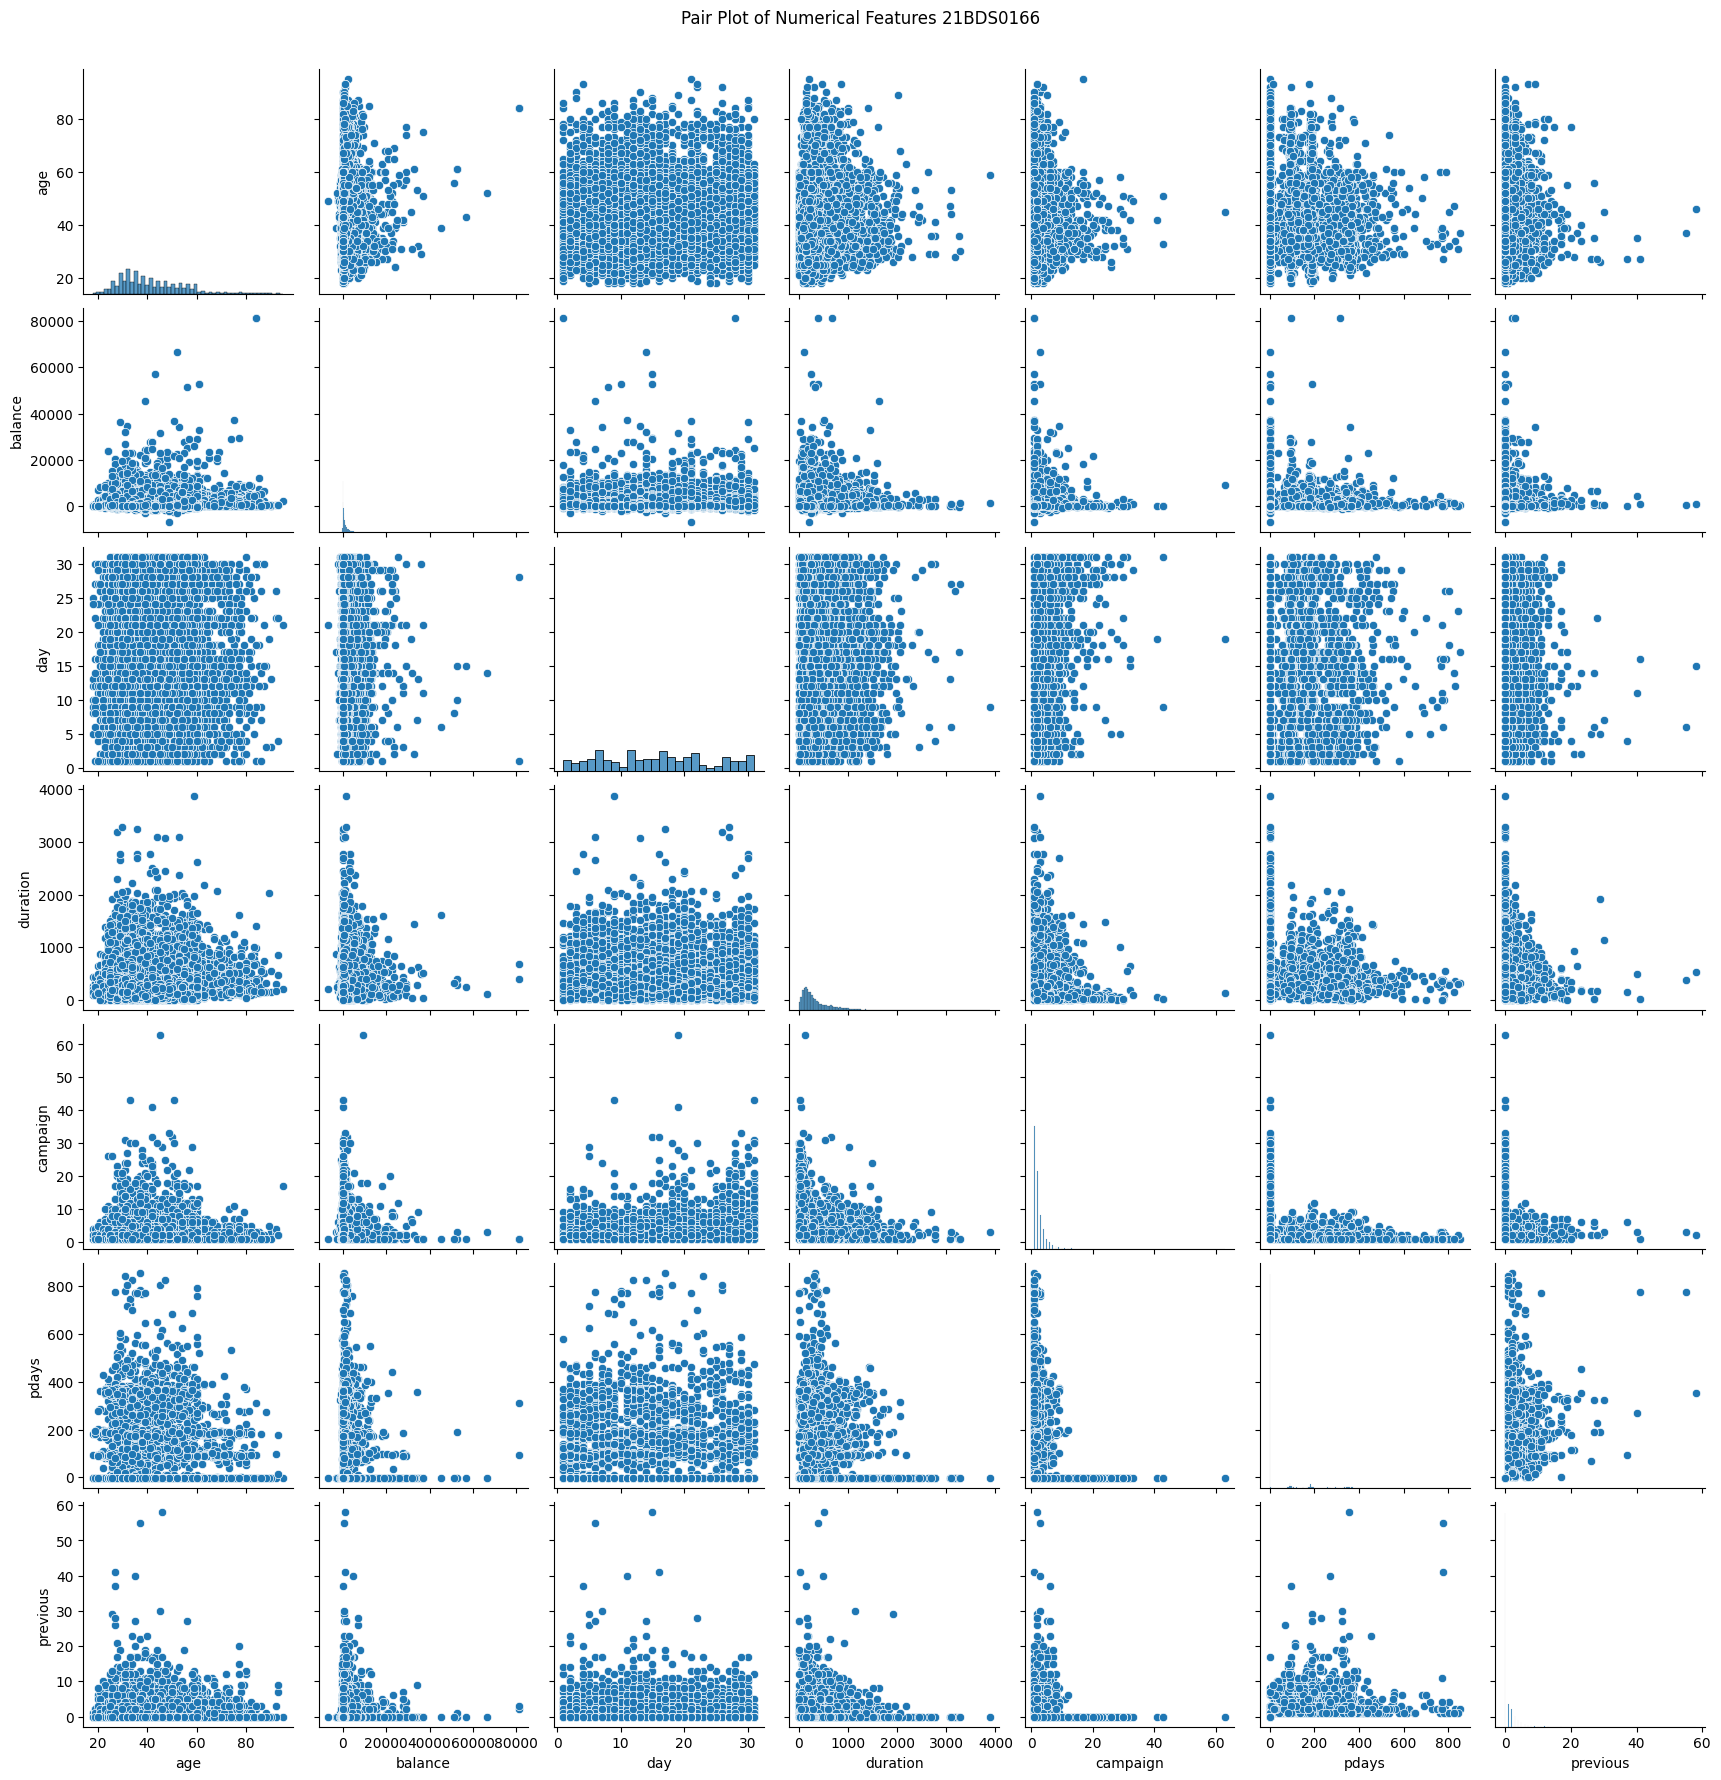

In [ ]:
# Multivariate Analysis

# Pair Plot (Numerical Features)
sns.pairplot(df[num_cols])
plt.suptitle('Pair Plot of Numerical Features 21BDS0166', y=1.02)
plt.show()


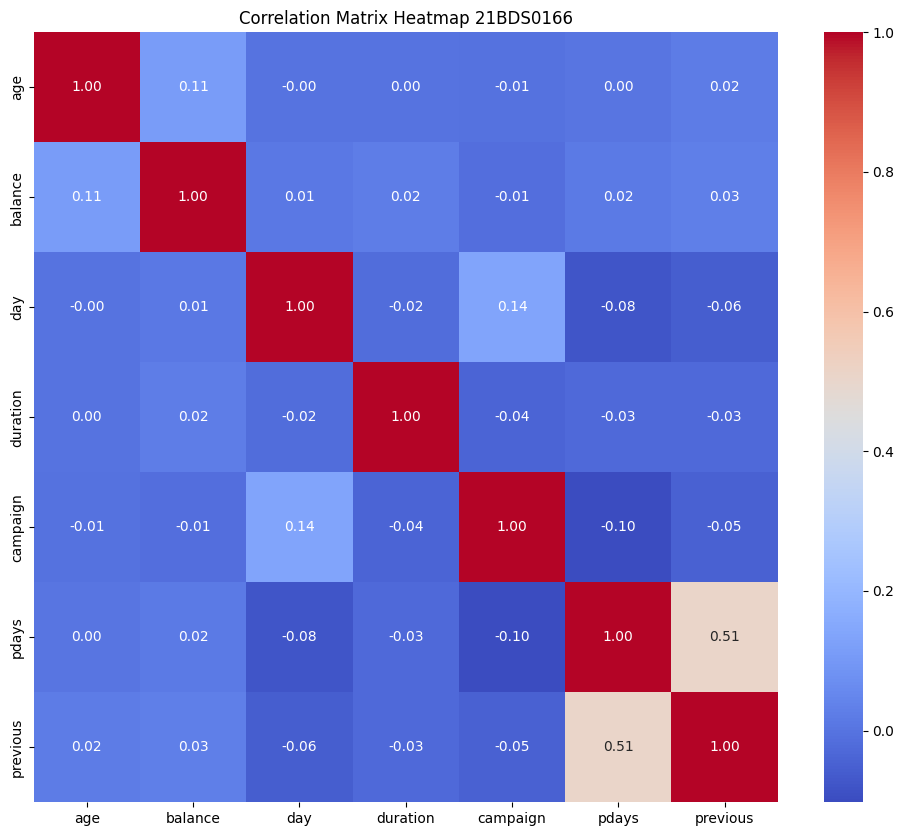

In [ ]:
# Multivariate Analysis
# Heatmap (Correlation Matrix)
plt.figure(figsize=(12, 10))
# Calculate correlation only for numerical columns
correlation_matrix = df[num_cols].corr()  # Select only numerical columns for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap 21BDS0166')
plt.show()

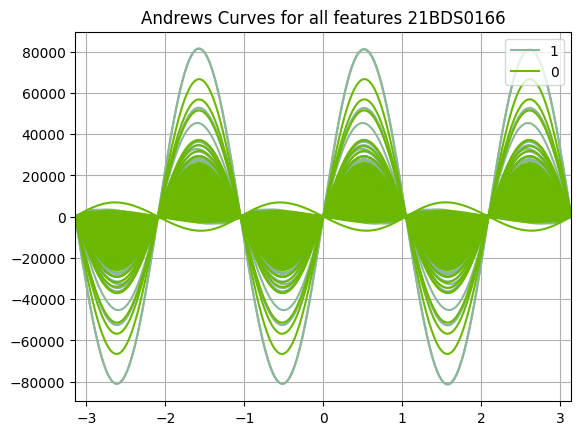

In [ ]:
# Multivariate Analysis
# Andrews Curves
from pandas.plotting import andrews_curves
andrews_curves(df, 'deposit')
plt.title('Andrews Curves for all features 21BDS0166')
plt.show()

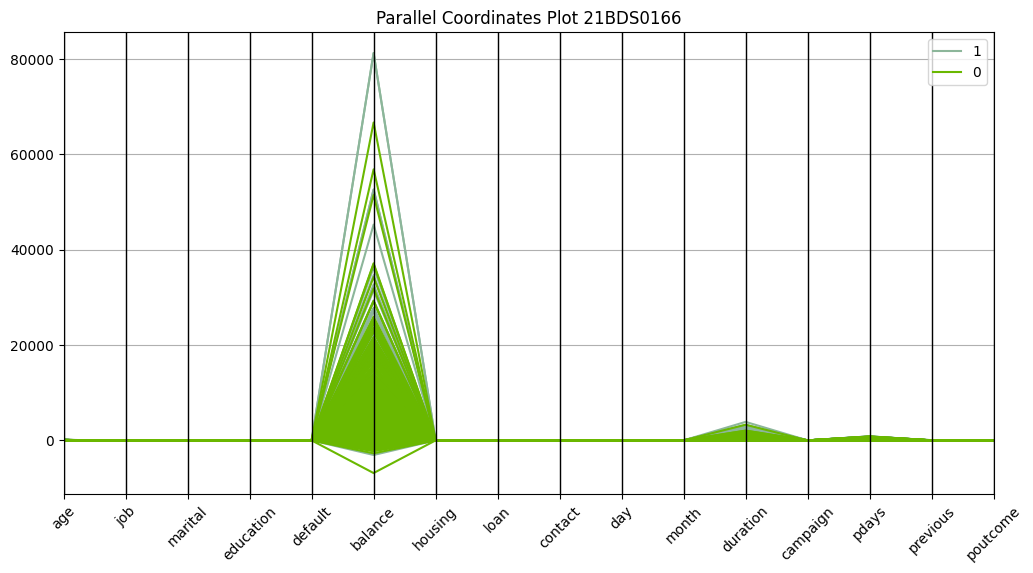

In [ ]:
# Multivariate Analysis
# Parallel Coordinates
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(df, 'deposit')
plt.title('Parallel Coordinates Plot 21BDS0166')
plt.xticks(rotation=45)
plt.show()

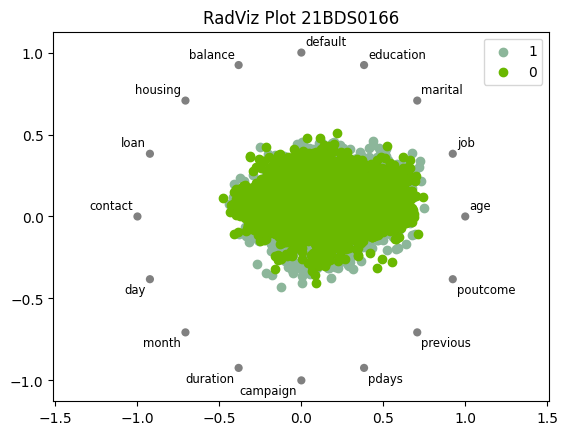

In [ ]:
# Multivariate Analysis
# RadViz
from pandas.plotting import radviz
radviz(df, 'deposit')
plt.title('RadViz Plot 21BDS0166')
plt.show()

Yes Deposits by Month:
     month  deposit  month_num
0       0      577        NaN
1       1      688        NaN
2       2      100        NaN
3       3      441        NaN
4       4      142        NaN
5       5      627        NaN
6       6      546        NaN
7       7      248        NaN
8       8      925        NaN
9       9      403        NaN
10     10      323        NaN
11     11      269        NaN


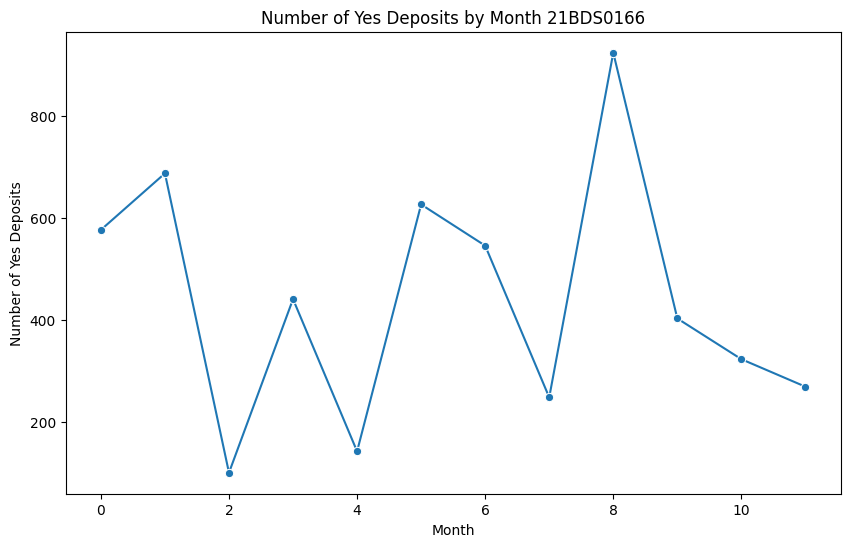

In [ ]:
# TIME SERIES ANALYSIS

# --- Trend Analysis by Month ---
# Group by month and count the number of 'yes' deposits where yes = 1
yes_deposits_by_month = df.groupby('month')['deposit'].apply(lambda x: (x == 1).sum()).reset_index()

# To sort the months in calendar order, map month abbreviations to their numerical order.
month_order = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
               'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
yes_deposits_by_month['month_num'] = yes_deposits_by_month['month'].map(month_order)
yes_deposits_by_month = yes_deposits_by_month.sort_values('month_num')

print("Yes Deposits by Month:\n", yes_deposits_by_month)

# Plot the monthly trend as a line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=yes_deposits_by_month, x='month', y='deposit', marker='o')
plt.title('Number of Yes Deposits by Month 21BDS0166')
plt.xlabel('Month')
plt.ylabel('Number of Yes Deposits')
plt.show()

Yes Deposits by Day:
      day  deposit
0    1.0       90
1    2.0      182
2    3.0      178
3    4.0      230
4    5.0      215
5    6.0      181
6    7.0      157
7    8.0      201
8    9.0      179
9   10.0      121
10  11.0      181
11  12.0      244
12  13.0      241
13  14.0      210
14  15.0      238
15  16.0      192
16  17.0      176
17  18.0      228
18  19.0      122
19  20.0      192
20  21.0      201
21  22.0      154
22  23.0      126
23  24.0       62
24  25.0      133
25  26.0      116
26  27.0      150
27  28.0      143
28  29.0      129
29  30.0      271
30  31.0       46


<ipython-input-89-9fd2ffc45605>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yes_deposits_by_day, x='day', y='deposit', palette='viridis')


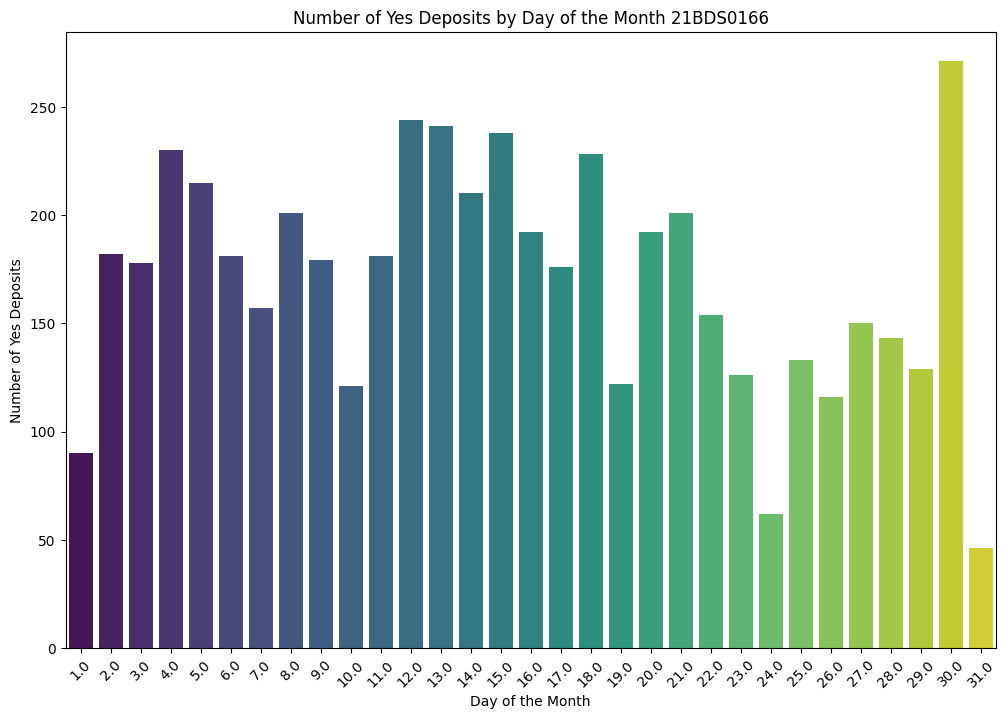

In [ ]:
# TIME SERIES ANALYSIS
# --- Trend Analysis by Day ---
# Group by day and count the number of 'yes' deposits
yes_deposits_by_day = df.groupby('day')['deposit'].apply(lambda x: (x == 1 ).sum()).reset_index()
yes_deposits_by_day = yes_deposits_by_day.sort_values('day')

print("Yes Deposits by Day:\n", yes_deposits_by_day)

# Plot the day trend as a bar plot
plt.figure(figsize=(12,8))
sns.barplot(data=yes_deposits_by_day, x='day', y='deposit', palette='viridis')
plt.title('Number of Yes Deposits by Day of the Month 21BDS0166')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Yes Deposits')
plt.xticks(rotation=45)
plt.show()

In [2]:
# PHASE 2 OF THEORY DA1 - TILL CLUSTERING

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gmean, hmean

In [3]:

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank.csv"
df = pd.read_csv(url)

# Display first few rows
print(df.head())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [4]:
# Measures of central tendency

def central_tendency_analysis(df):
    print(f"Statistical Analysis for Central Tendency on numeric columns:")
    print("-" * 50)

    # List of numeric columns in dataset
    numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

    for column in numeric_columns:
        print(f"\nAnalysis for column: {column}")
        print("-" * 30)

        # Mean calculations
        try:
            arithmetic_mean = df[column].mean()
            harmonic_mean = hmean(df[column][df[column] > 0])  # Harmonic mean for positive values
            geometric_mean = gmean(df[column][df[column] > 0])  # Geometric mean for positive values

            print(f"Arithmetic Mean: {arithmetic_mean}")
            print(f"Harmonic Mean (positive values only): {harmonic_mean}")
            print(f"Geometric Mean (positive values only): {geometric_mean}")
        except Exception as e:
            print(f"Error in mean calculations for {column}: {e}")

        print("\nQuantile-based measures:")
        # Median and Quantiles
        median = df[column].median()
        print(f"Median: {median}")

        # Quantiles (0% to 100% with an interval of 25%)
        quantiles = df[column].quantile([0.00, 0.25, 0.50, 0.75, 1.00])
        print("Quantiles (0%, 25%, 50%, 75%, 100%):")
        print(quantiles)

        # Deciles (0% to 100% with an interval of 10%)
        print("\nDeciles:")
        deciles = df[column].quantile(np.linspace(0, 1, 11))  # 10 deciles
        print(deciles)

        # Percentiles (0% to 100% with an interval of 1%)
        print("\nPercentiles:")
        percentiles = df[column].quantile(np.linspace(0, 1, 101))  # 100 percentiles
        print(percentiles)

# Output
central_tendency_analysis(df)

Statistical Analysis for Central Tendency on numeric columns:
--------------------------------------------------

Analysis for column: age
------------------------------
Arithmetic Mean: 41.231947679627304
Harmonic Mean (positive values only): 38.16263970857261
Geometric Mean (positive values only): 39.638773025199946

Quantile-based measures:
Median: 39.0
Quantiles (0%, 25%, 50%, 75%, 100%):
0.00    18.0
0.25    32.0
0.50    39.0
0.75    49.0
1.00    95.0
Name: age, dtype: float64

Deciles:
0.0    18.0
0.1    28.0
0.2    31.0
0.3    33.0
0.4    36.0
0.5    39.0
0.6    42.0
0.7    47.0
0.8    52.0
0.9    58.0
1.0    95.0
Name: age, dtype: float64

Percentiles:
0.00    18.0
0.01    22.0
0.02    24.0
0.03    25.0
0.04    25.0
        ... 
0.96    64.0
0.97    68.0
0.98    72.0
0.99    77.0
1.00    95.0
Name: age, Length: 101, dtype: float64

Analysis for column: balance
------------------------------
Arithmetic Mean: 1528.5385235620856
Harmonic Mean (positive values only): 74.71119830090

In [5]:
# Measure of Dispersions (Range, IQR, Interdecile range, Deviation (mean and Standard deviation), Skewness and Kurtosis)

def dispersion_analysis(df):
    print("Statistical Analysis for Measures of Dispersion on numeric columns:")
    print("-" * 60)

    # List of numeric columns from the  dataset
    numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

    for column in numeric_columns:
        print(f"\nAnalysis for column: {column}")
        print("-" * 30)

        try:
            # Range (Max - Min)
            data_range = df[column].max() - df[column].min()
            print(f"Range: {data_range}")

            # Interquartile Range (IQR = Q3 - Q1)
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            print(f"Interquartile Range (IQR): {IQR}")

            # Interdecile Range (D9 - D1)
            D1 = df[column].quantile(0.1)
            D9 = df[column].quantile(0.9)
            interdecile_range = D9 - D1
            print(f"Interdecile Range (D9 - D1): {interdecile_range}")

            # Mean Deviation (MAD) - Calculated manually
            mean_value = df[column].mean()
            mad = np.mean(np.abs(df[column] - mean_value))
            print(f"Mean Absolute Deviation (MAD): {mad}")

            # Standard Deviation
            std_deviation = df[column].std()
            print(f"Standard Deviation: {std_deviation}")

            # Variance
            variance = df[column].var()
            print(f"Variance: {variance}")

            # Skewness
            skewness = df[column].skew()
            print(f"Skewness: {skewness}")

            # Kurtosis
            kurtosis = df[column].kurtosis()
            print(f"Kurtosis: {kurtosis}")

        except Exception as e:
            print(f"Error in dispersion calculations for {column}: {e}")

# Output
dispersion_analysis(df)

Statistical Analysis for Measures of Dispersion on numeric columns:
------------------------------------------------------------

Analysis for column: age
------------------------------
Range: 77
Interquartile Range (IQR): 17.0
Interdecile Range (D9 - D1): 30.0
Mean Absolute Deviation (MAD): 9.649931594965011
Standard Deviation: 11.913369192215445
Variance: 141.92836551002807
Skewness: 0.8627796373814871
Kurtosis: 0.6215402926955051

Analysis for column: balance
------------------------------
Range: 88051
Interquartile Range (IQR): 1586.0
Interdecile Range (D9 - D1): 3897.599999999995
Mean Absolute Deviation (MAD): 1662.9590855444508
Standard Deviation: 3225.4133259461923
Variance: 10403291.123191278
Skewness: 8.224619112755489
Kurtosis: 126.86130264291481

Analysis for column: day
------------------------------
Range: 30
Interquartile Range (IQR): 14.0
Interdecile Range (D9 - D1): 24.0
Mean Absolute Deviation (MAD): 7.134300531588973
Standard Deviation: 8.420739541006434
Variance: 70.

Frequency Distribution Analysis for column: age
--------------------------------------------------
Frequency Distribution:
age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: count, Length: 76, dtype: int64

Relative Frequency Distribution:
age
18    0.000717
19    0.001165
20    0.001792
21    0.002688
22    0.004300
        ...   
89    0.000090
90    0.000179
92    0.000179
93    0.000179
95    0.000090
Name: count, Length: 76, dtype: float64

Cumulative Frequency Distribution:
age
18        8
19       21
20       41
21       71
22      119
      ...  
89    11155
90    11157
92    11159
93    11161
95    11162
Name: count, Length: 76, dtype: int64


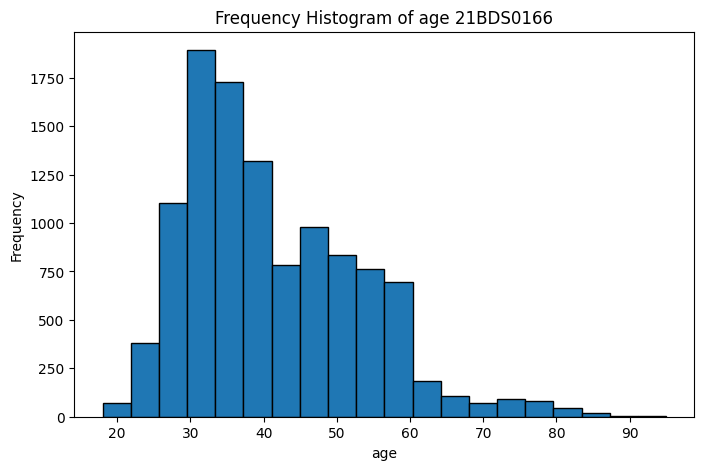

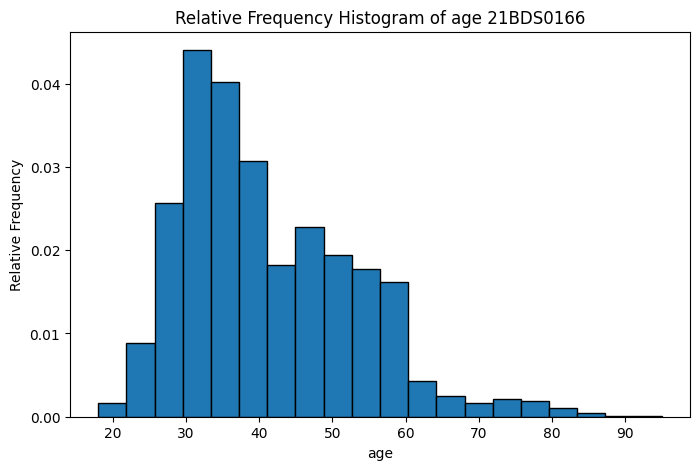

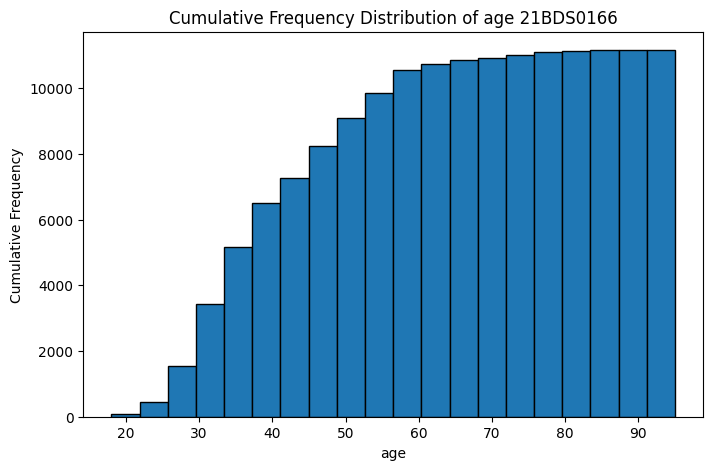

Frequency Distribution Analysis for column: balance
--------------------------------------------------
Frequency Distribution:
balance
-6847     1
-3058     1
-2712     1
-2282     1
-2049     1
         ..
 51439    1
 52587    2
 56831    1
 66653    1
 81204    2
Name: count, Length: 3805, dtype: int64

Relative Frequency Distribution:
balance
-6847     0.000090
-3058     0.000090
-2712     0.000090
-2282     0.000090
-2049     0.000090
            ...   
 51439    0.000090
 52587    0.000179
 56831    0.000090
 66653    0.000090
 81204    0.000179
Name: count, Length: 3805, dtype: float64

Cumulative Frequency Distribution:
balance
-6847         1
-3058         2
-2712         3
-2282         4
-2049         5
          ...  
 51439    11156
 52587    11158
 56831    11159
 66653    11160
 81204    11162
Name: count, Length: 3805, dtype: int64


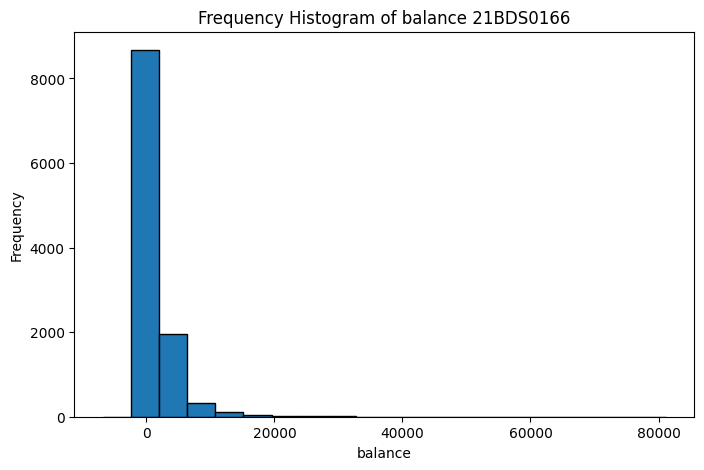

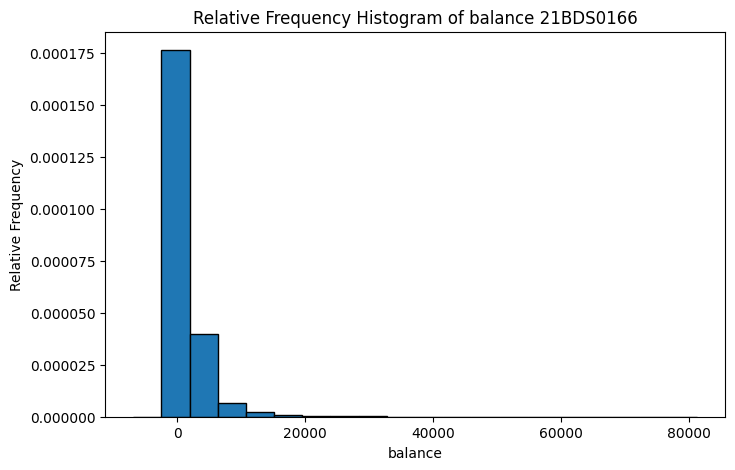

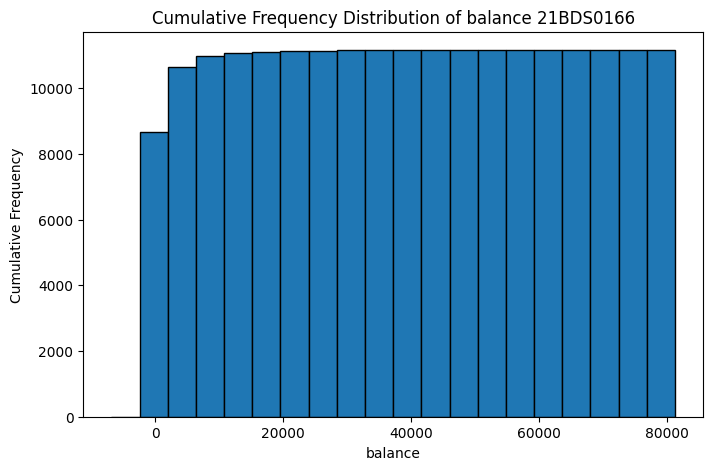

In [6]:
# Frequency Distribution with necessary plots ( Frequency Distribution, histogram, Relative frequency distribution and cumulative frequency distribution)

def frequency_distribution(df, column):
    print(f"Frequency Distribution Analysis for column: {column}")
    print("-" * 50)

    # Frequency Distribution
    frequency = df[column].value_counts().sort_index()
    print("Frequency Distribution:")
    print(frequency)

    # Relative Frequency Distribution
    relative_frequency = frequency / frequency.sum()
    print("\nRelative Frequency Distribution:")
    print(relative_frequency)

    # Cumulative Frequency Distribution
    cumulative_frequency = frequency.cumsum()
    print("\nCumulative Frequency Distribution:")
    print(cumulative_frequency)

    # Plotting Frequency Histogram
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.title(f'Frequency Histogram of {column} 21BDS0166')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Plotting Relative Frequency Histogram
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=20, edgecolor='black', density=True)
    plt.title(f'Relative Frequency Histogram of {column} 21BDS0166')
    plt.xlabel(column)
    plt.ylabel('Relative Frequency')
    plt.show()

    # Plotting Cumulative Frequency Distribution
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=20, cumulative=True, edgecolor='black')
    plt.title(f'Cumulative Frequency Distribution of {column} 21BDS0166')
    plt.xlabel(column)
    plt.ylabel('Cumulative Frequency')
    plt.show()

# For 2 columns
frequency_distribution(df, 'age')
frequency_distribution(df, 'balance')

Categorical Variable Analysis for column: job
--------------------------------------------------
Frequency Distribution:
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


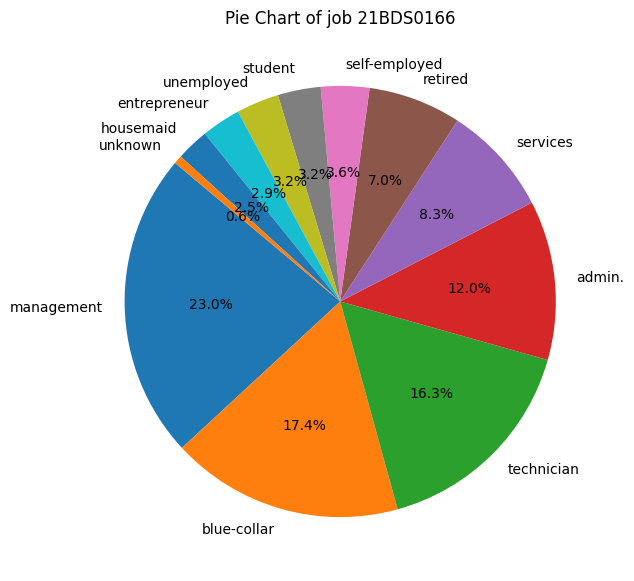

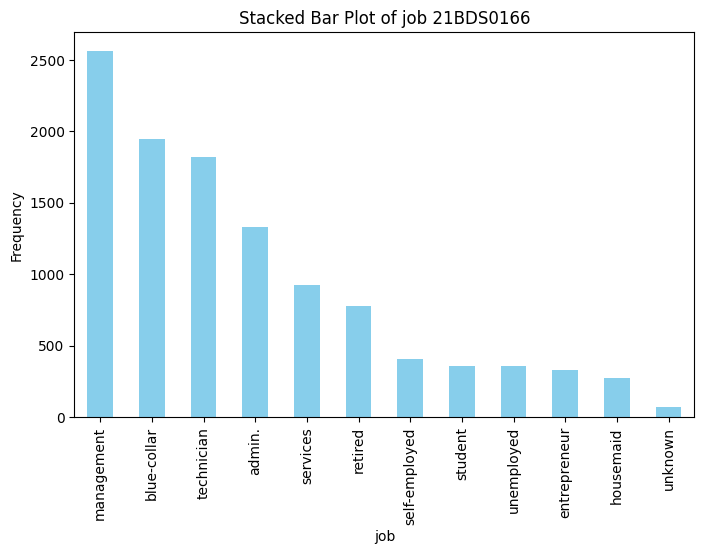

In [7]:
# From the categorical variable ( Pie plot and Stacked bar plot)

def categorical_variable_analysis(df, column):
    print(f"Categorical Variable Analysis for column: {column}")
    print("-" * 50)

    # Frequency Distribution
    frequency = df[column].value_counts()
    print("Frequency Distribution:")
    print(frequency)

    # Plotting Pie Chart
    plt.figure(figsize=(7, 7))
    plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {column} 21BDS0166')
    plt.show()

    # Stacked Bar Plot
    plt.figure(figsize=(8, 5))
    frequency.plot(kind='bar', color='skyblue')
    plt.title(f'Stacked Bar Plot of {column} 21BDS0166')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Categorical column: 'job'
categorical_variable_analysis(df, 'job')

In [8]:
# 2D ANALYSIS

def contingency_tables(df):
    print("2-Way Contingency Tables")
    print("-" * 50)

    # Categorical-Categorical Contingency Table (using 'job' and 'marital')
    print("\nCategorical-Categorical Contingency Table (Job vs Marital): 21BDS0166")
    cat_cat_table = pd.crosstab(df['job'], df['marital'])
    print(cat_cat_table)

    # Numerical-Numerical Correlation Table (using 'age' and 'balance')
    print("\nNumerical-Numerical Correlation Table (Age vs Balance): 21BDS0166")
    num_num_corr = df[['age', 'balance']].corr()
    print(num_num_corr)

    # Categorical-Numerical Grouped Statistics (using 'job' and 'balance')
    print("\nCategorical-Numerical Grouped Statistics (Job vs Balance): 21BDS0166")
    cat_num_table = df.groupby('job')['balance'].describe()
    print(cat_num_table)

# Output
contingency_tables(df)

2-Way Contingency Tables
--------------------------------------------------

Categorical-Categorical Contingency Table (Job vs Marital): 21BDS0166
marital        divorced  married  single
job                                     
admin.              182      677     475
blue-collar         149     1335     460
entrepreneur         42      234      52
housemaid            46      190      38
management          288     1428     850
retired             171      581      26
self-employed        39      222     144
services            121      504     298
student               2       15     343
technician          204      930     689
unemployed           47      186     124
unknown               2       49      19

Numerical-Numerical Correlation Table (Age vs Balance): 21BDS0166
            age  balance
age      1.0000   0.1123
balance  0.1123   1.0000

Categorical-Numerical Grouped Statistics (Job vs Balance): 21BDS0166
                count         mean          std     min     25%    

In [9]:

def three_way_contingency_table(df):
    print("3-Way Contingency Table: Job, Marital, Deposit")
    print("-" * 60)

    # Creating a 3-way contingency table
    three_way_table = pd.crosstab([df['job'], df['marital']], df['deposit'])
    print(three_way_table)

# Output
three_way_contingency_table(df)

3-Way Contingency Table: Job, Marital, Deposit
------------------------------------------------------------
deposit                  no  yes
job           marital           
admin.        divorced   92   90
              married   371  306
              single    240  235
blue-collar   divorced   91   58
              married   898  437
              single    247  213
entrepreneur  divorced   27   15
              married   153   81
              single     25   27
housemaid     divorced   28   18
              married   123   67
              single     14   24
management    divorced  146  142
              married   747  681
              single    372  478
retired       divorced   50  121
              married   199  382
              single     13   13
self-employed divorced   17   22
              married   143   79
              single     58   86
services      divorced   71   50
              married   326  178
              single    157  141
student       divorced    1    1
 

In [11]:
import scipy.stats as stats

def contingency_analysis(df):
    print("3-Way Contingency Table Analysis")
    print("-" * 60)

    # Step 1: Create the 3-way contingency table
    three_way_table = pd.crosstab([df['job'], df['marital']], df['deposit'])
    print("\n3-Way Contingency Table (Job, Marital, Deposit): 21BDS0166")
    print(three_way_table)

    # Row Profile Dataset (Proportion within rows)
    row_profile = three_way_table.div(three_way_table.sum(axis=1), axis=0)
    print("\nRow Profile Dataset (Proportion within rows): 21BDS0166")
    print(row_profile)

    # Column Profile Dataset (Proportion within columns)
    col_profile = three_way_table.div(three_way_table.sum(axis=0), axis=1)
    print("\nColumn Profile Dataset (Proportion within columns): 21BDS0166")
    print(col_profile)

    # Relative Frequency Dataset (Proportion of each cell relative to the grand total)
    total = three_way_table.values.sum()
    relative_freq = three_way_table / total
    print("\nRelative Frequency Dataset (Proportion of total): 21BDS0166")
    print(relative_freq)

    # Chi-Square Dataset (Chi-Square statistic and expected frequencies)
    chi2, p, dof, expected = stats.chi2_contingency(three_way_table)
    expected_df = pd.DataFrame(expected, index=three_way_table.index, columns=three_way_table.columns)

    print("\nChi-Square Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("\nExpected Frequency Table:")
    print(expected_df)

# Output
contingency_analysis(df)

3-Way Contingency Table Analysis
------------------------------------------------------------

3-Way Contingency Table (Job, Marital, Deposit): 21BDS0166
deposit                  no  yes
job           marital           
admin.        divorced   92   90
              married   371  306
              single    240  235
blue-collar   divorced   91   58
              married   898  437
              single    247  213
entrepreneur  divorced   27   15
              married   153   81
              single     25   27
housemaid     divorced   28   18
              married   123   67
              single     14   24
management    divorced  146  142
              married   747  681
              single    372  478
retired       divorced   50  121
              married   199  382
              single     13   13
self-employed divorced   17   22
              married   143   79
              single     58   86
services      divorced   71   50
              married   326  178
              single 

In [12]:
pip install plotnine

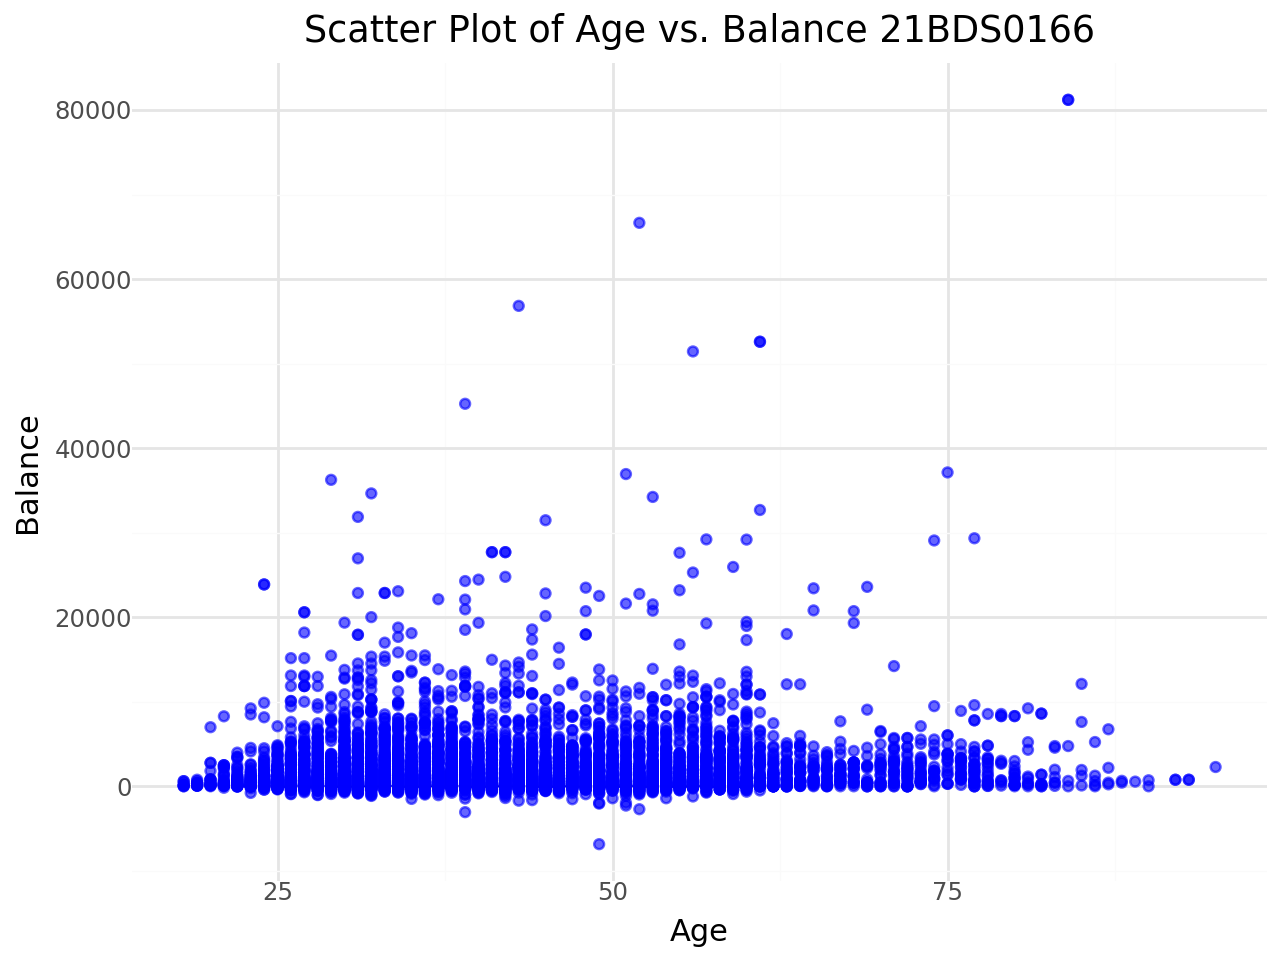

In [14]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, labs, theme_minimal
from IPython.display import display

# Scatter Plot using ggplot (plotnine)
def scatter_plot_ggplot(df):
    # Scatter plot: age vs. balance
    plot = (
        ggplot(df, aes(x='age', y='balance')) +
        geom_point(color='blue', alpha=0.6) +
        labs(
            title='Scatter Plot of Age vs. Balance 21BDS0166',
            x='Age',
            y='Balance'
        ) +
        theme_minimal()
    )
    # Display the plot correctly
    display(plot)

# Output
scatter_plot_ggplot(df)

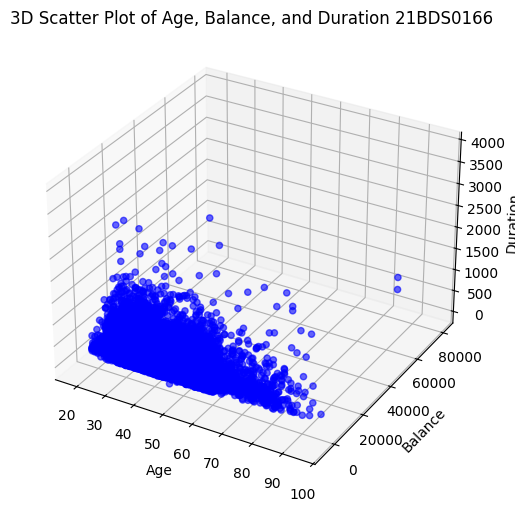

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Scatter Plot using scatterplot3d
def scatter_plot_3d(df):
    # Selecting three numerical variables
    x = df['age']
    y = df['balance']
    z = df['duration']

    # Creating a 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    scatter = ax.scatter(x, y, z, c='blue', alpha=0.6)

    # Adding titles and labels
    ax.set_title('3D Scatter Plot of Age, Balance, and Duration 21BDS0166')
    ax.set_xlabel('Age')
    ax.set_ylabel('Balance')
    ax.set_zlabel('Duration')

    # Displaying the plot
    plt.show()

# Output
scatter_plot_3d(df)


2-Way Contingency Table (Job vs Marital):
marital        divorced  married  single
job                                     
admin.              182      677     475
blue-collar         149     1335     460
entrepreneur         42      234      52
housemaid            46      190      38
management          288     1428     850
retired             171      581      26
self-employed        39      222     144
services            121      504     298
student               2       15     343
technician          204      930     689
unemployed           47      186     124
unknown               2       49      19


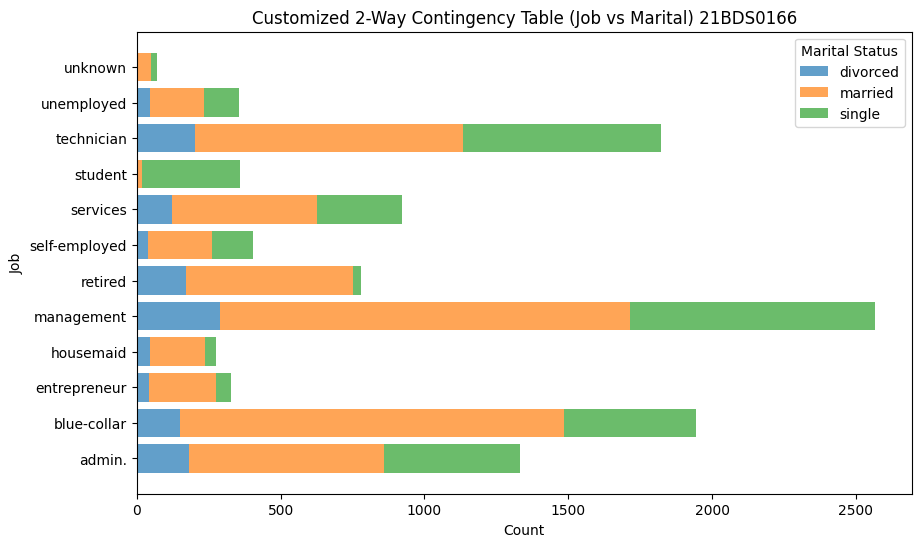

In [17]:

# Function to create and plot a customized 2-way contingency table
def plot_custom_contingency_table(df):
    # Create the 2-way contingency table for 'job' vs 'marital'
    contingency_table = pd.crosstab(df['job'], df['marital'])
    print("\n2-Way Contingency Table (Job vs Marital):")
    print(contingency_table)

    # Plotting the contingency table as a horizontal bar plot
    plt.figure(figsize=(10, 6))

    # Iterate over columns to plot each marital status
    for i, col in enumerate(contingency_table.columns):
        # Using type='h' equivalent: Horizontal bars with color variation
        plt.barh(contingency_table.index, contingency_table[col],
                 left=contingency_table.iloc[:, :i].sum(axis=1),
                 label=col, alpha=0.7)

    # Customization: Changing color and shape
    plt.title('Customized 2-Way Contingency Table (Job vs Marital) 21BDS0166')
    plt.xlabel('Count')
    plt.ylabel('Job')
    plt.legend(title='Marital Status', loc='upper right')

    # Displaying the plot
    plt.show()

# Output
plot_custom_contingency_table(df)


3-Way Contingency Table (Job, Marital, Deposit):
deposit                  no  yes
job           marital           
admin.        divorced   92   90
              married   371  306
              single    240  235
blue-collar   divorced   91   58
              married   898  437
              single    247  213
entrepreneur  divorced   27   15
              married   153   81
              single     25   27
housemaid     divorced   28   18
              married   123   67
              single     14   24
management    divorced  146  142
              married   747  681
              single    372  478
retired       divorced   50  121
              married   199  382
              single     13   13
self-employed divorced   17   22
              married   143   79
              single     58   86
services      divorced   71   50
              married   326  178
              single    157  141
student       divorced    1    1
              married     5   10
              single     8

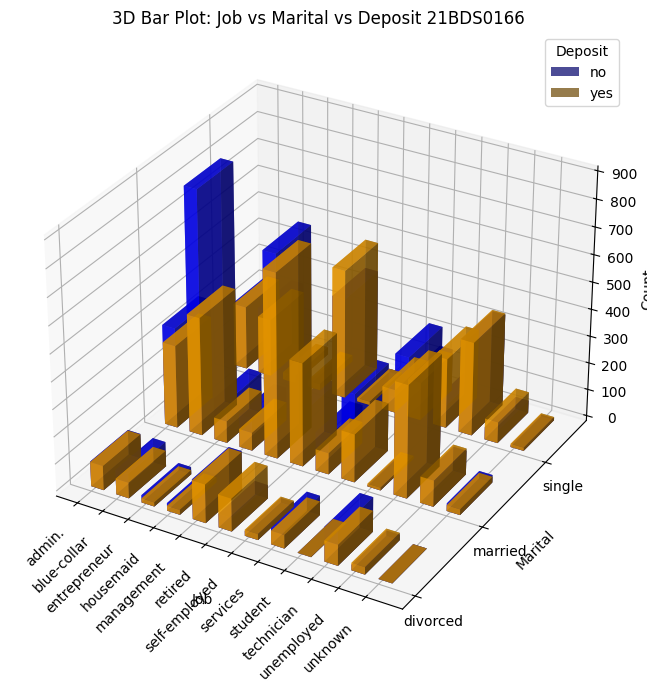

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Function to create a 3D bar plot
def plot_3d_bar(df):
    # Create the 3-way contingency table (Job, Marital, Deposit)
    contingency_table = pd.crosstab([df['job'], df['marital']], df['deposit'])
    print("\n3-Way Contingency Table (Job, Marital, Deposit):")
    print(contingency_table)

    # Prepare data for 3D bar plot
    x_labels = contingency_table.index.get_level_values(0).unique()
    y_labels = contingency_table.index.get_level_values(1).unique()
    z_labels = contingency_table.columns

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Creating 3D bars
    xpos, ypos = [], []
    zpos = 0

    # Loop through the combinations of job and marital
    for i, job in enumerate(x_labels):
        for j, marital in enumerate(y_labels):
            xpos.append(i)
            ypos.append(j)

    xpos = np.array(xpos)
    ypos = np.array(ypos)
    dz = contingency_table.values.flatten()

    # Bar settings
    dx = dy = 0.5  # Width of the bars
    colors = ['blue', 'orange']

    # Plotting 3D bars
    for k, label in enumerate(z_labels):
        ax.bar3d(xpos, ypos, zpos, dx, dy, dz[k::len(z_labels)], color=colors[k % 2], alpha=0.7, label=label)

    # Adding labels and title
    ax.set_title('3D Bar Plot: Job vs Marital vs Deposit 21BDS0166')
    ax.set_xlabel('Job')
    ax.set_ylabel('Marital')
    ax.set_zlabel('Count')

    # Setting x and y ticks
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45, ha='right')
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_yticklabels(y_labels)

    # Adding legend
    ax.legend(title='Deposit', loc='upper right')

    # Display the plot
    plt.show()

# Output
plot_3d_bar(df)

<ipython-input-19-84d4ba86daa9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



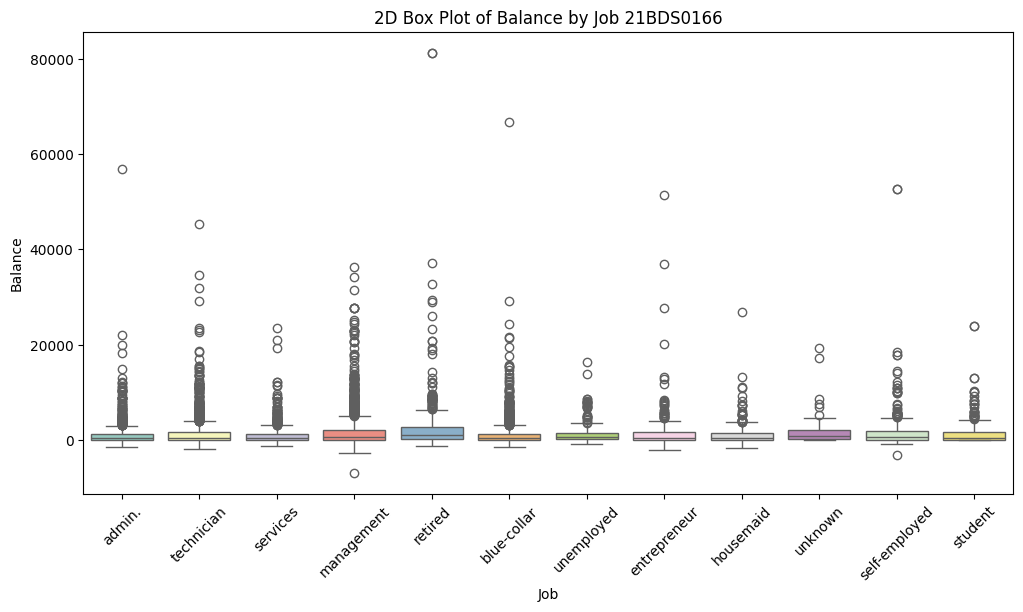

In [19]:

import seaborn as sns

# Function to create a 2D box plot (one variable as categorical)
def plot_2d_box(df):
    plt.figure(figsize=(12, 6))

    # Creating the box plot using Seaborn
    sns.boxplot(x='job', y='balance', data=df, palette='Set3')

    # Customizing the plot
    plt.title('2D Box Plot of Balance by Job 21BDS0166')
    plt.xlabel('Job')
    plt.ylabel('Balance')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Displaying the plot
    plt.show()

# Output
plot_2d_box(df)

In [22]:
# Dimensionality Reduction

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'])

# Selecting numerical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X = df_encoded[numerical_cols]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

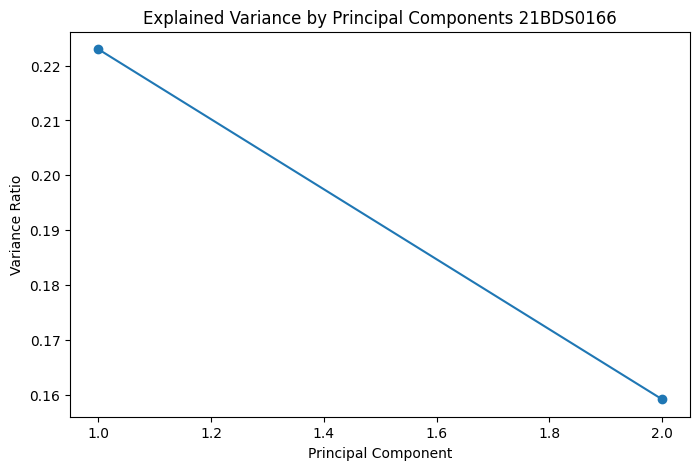

Explained Variance Ratio: [0.22297548 0.15916179]


In [23]:
# Dimensionality Reduction - PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 3), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components 21BDS0166')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

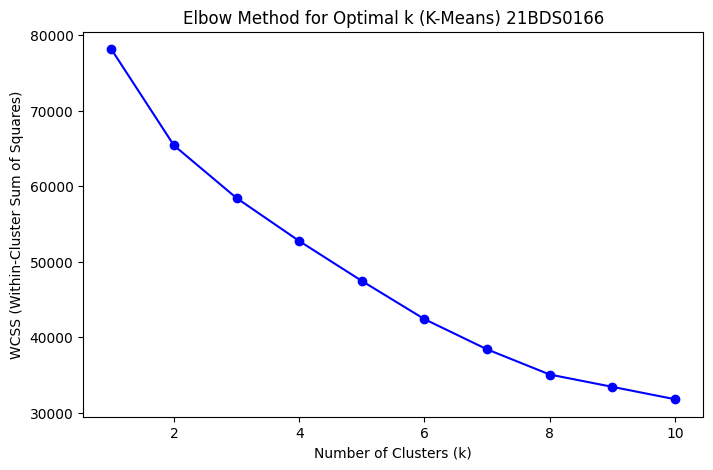

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'])

# Select numerical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X = df_encoded[numerical_cols]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Elbow Method to Find Optimal Clusters
wcss = []

# Calculate WCSS for different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal k (K-Means) 21BDS0166')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

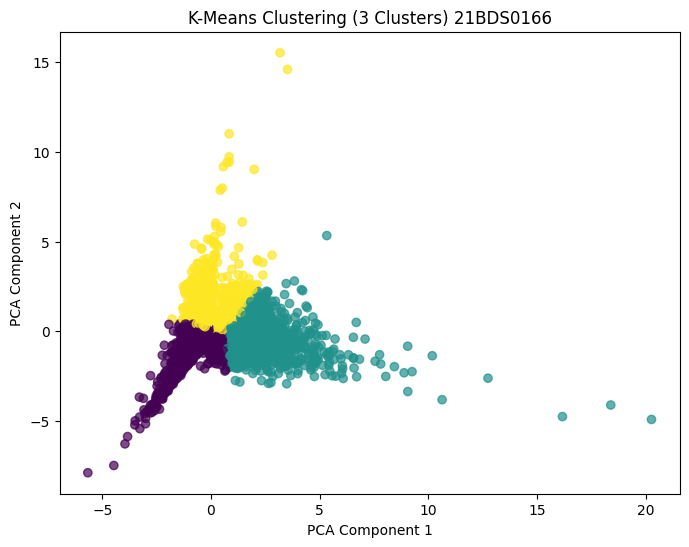

In [24]:
# K-Means Clustering

from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_pca)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', alpha=0.7)
plt.title('K-Means Clustering (3 Clusters) 21BDS0166')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

# Evaluation of K-Means Clustering
kmeans_silhouette = silhouette_score(X_pca, kmeans_clusters)
print("K-Means Silhouette Score:", kmeans_silhouette)

K-Means Silhouette Score: 0.4395733906619086


In [32]:

from scipy.spatial.distance import pdist, squareform

# Preprocessing: Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'])

# Selecting numerical columns for distance calculation
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X = df_encoded[numerical_cols]

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Computing the distance matrix using the Euclidean method
distance_matrix = pdist(X_scaled, metric='euclidean')

# Converting to a square matrix
distance_matrix_square = squareform(distance_matrix)

# Creating a DataFrame for better visualization
distance_df = pd.DataFrame(distance_matrix_square, columns=df.index, index=df.index)

# Displaying the distance matrix
print("Euclidean Distance Matrix:")
print(distance_df)

Euclidean Distance Matrix:
          0         1         2         3         4         5         6      \
0      0.000000  1.438816  1.842030  1.376091  1.374524  2.147407  0.712325   
1      1.438816  0.000000  1.334242  2.668293  2.323230  2.883378  0.812768   
2      1.842030  1.334242  0.000000  2.639376  2.386221  2.444059  1.382572   
3      1.376091  2.668293  2.639376  0.000000  0.848740  1.384761  1.868849   
4      1.374524  2.323230  2.386221  0.848740  0.000000  1.058396  1.590969   
...         ...       ...       ...       ...       ...       ...       ...   
11157  3.684899  4.364930  3.796643  2.834300  2.802738  2.156659  3.735517   
11158  3.690809  4.571739  4.139246  2.656894  2.598071  2.065380  3.877673   
11159  3.881508  4.606826  4.029389  2.947467  2.897507  2.199355  3.962620   
11160  4.328950  5.136715  4.851886  3.442721  3.454262  3.156252  4.531109   
11161  2.565140  3.078736  2.352122  1.985551  1.788650  0.920737  2.515680   

          7         8   

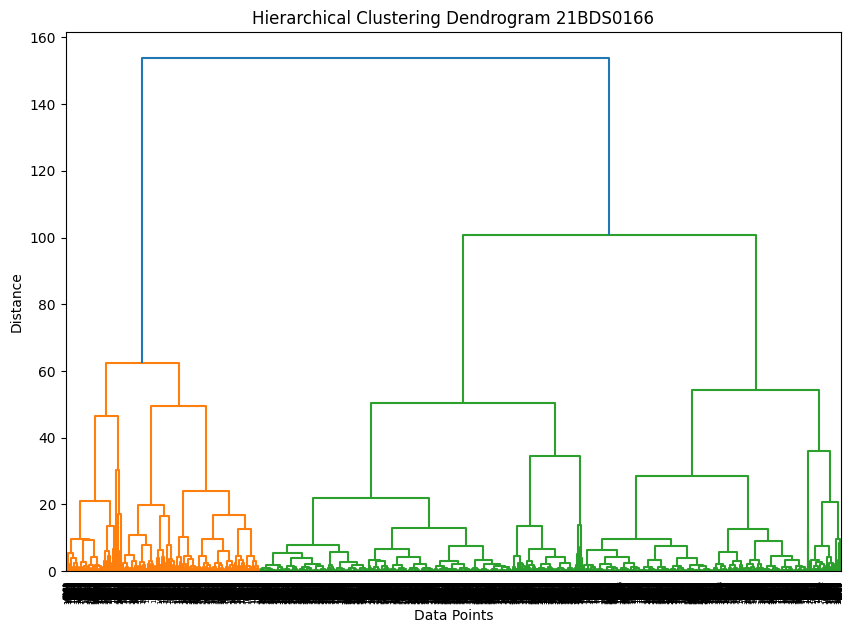

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering
linked = linkage(X_pca, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram 21BDS0166')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

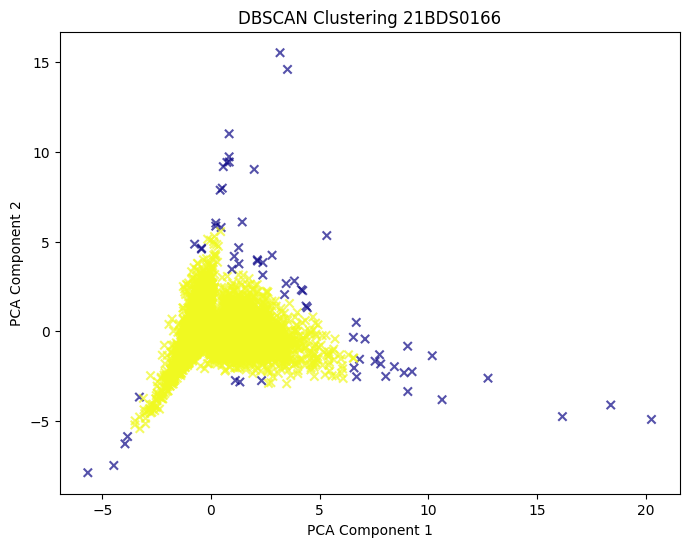

In [27]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_pca)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters, cmap='plasma', marker='x', alpha=0.7)
plt.title('DBSCAN Clustering 21BDS0166')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [28]:
# Evaluation
dbscan_silhouette = silhouette_score(X_pca, dbscan_clusters)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

DBSCAN Silhouette Score: 0.7637403394250606


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['balance'], test_size=0.3, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prediction
y_pred = lr.predict(X_test)

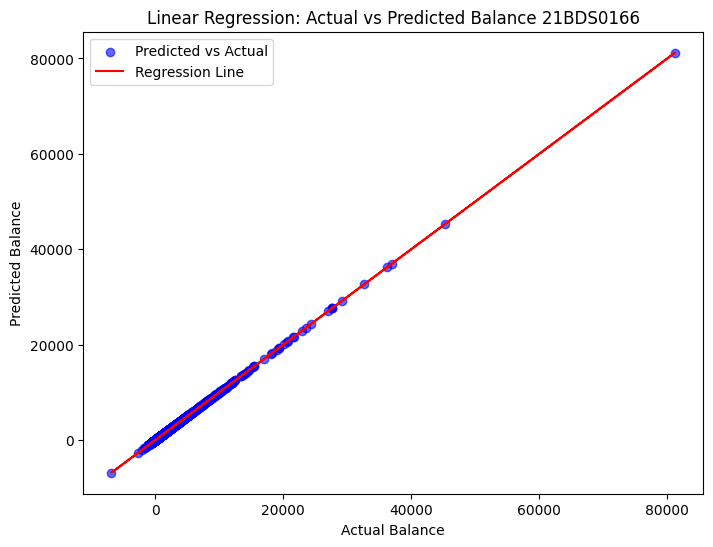

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Plotting the regression line
m, c = np.polyfit(y_test, y_pred, 1)  # Find slope (m) and intercept (c)
plt.plot(y_test, m * y_test + c, color='red', label='Regression Line')

# Adding labels and title
plt.title('Linear Regression: Actual vs Predicted Balance 21BDS0166')
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 3.341777102470792e-24
R-squared (R2): 1.0


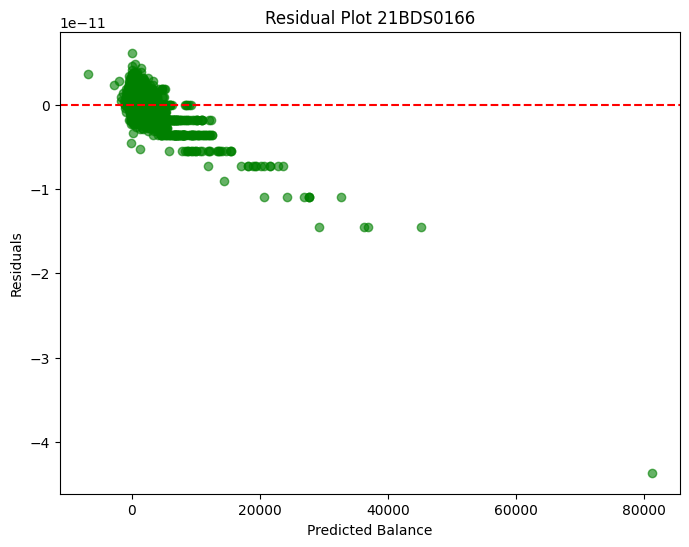

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot 21BDS0166')
plt.xlabel('Predicted Balance')
plt.ylabel('Residuals')
plt.show()

In [43]:
# Multiple Linear Regression
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'])

# Select numerical columns for multiple linear regression
numerical_cols = ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']
X = df_encoded[numerical_cols]  # Features
y = df['balance']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X_train, y_train)

# Predict on test data
y_pred = mlr.predict(X_test)

In [44]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

MSE: 10402672.5984
R-squared: 0.0134
Adjusted R-squared: 0.0117


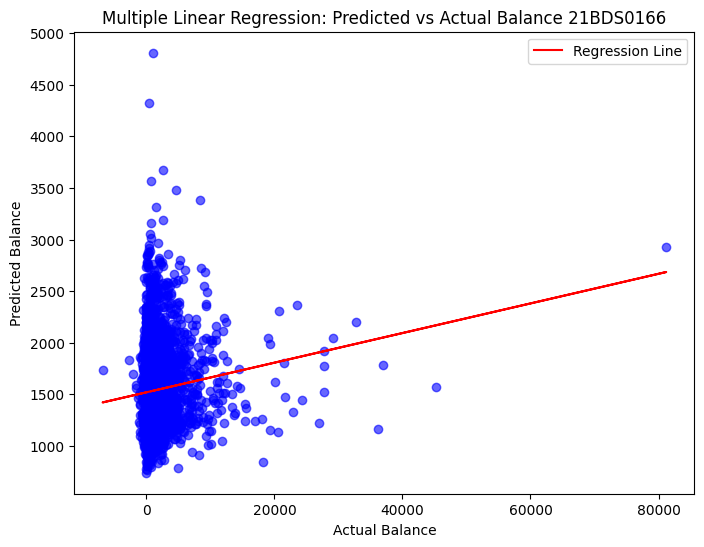

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('Multiple Linear Regression: Predicted vs Actual Balance 21BDS0166')
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')

# Plotting the regression line
m, c = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + c, color='red', label='Regression Line')
plt.legend()
plt.show()

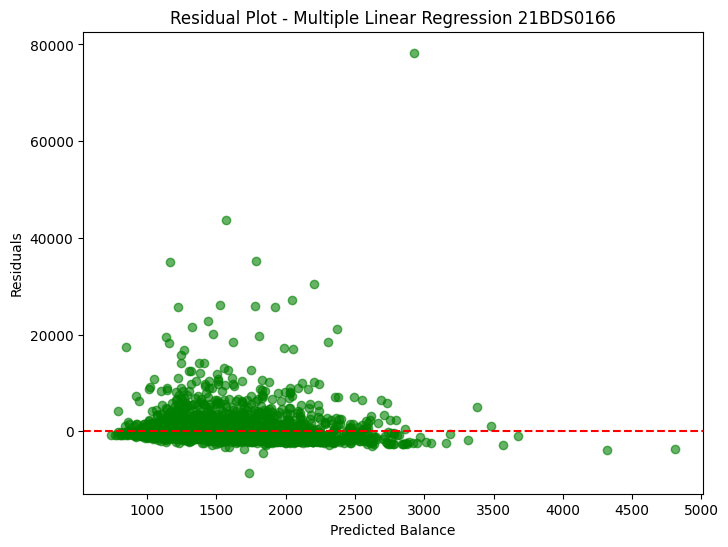

In [46]:
# Calculating residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - Multiple Linear Regression 21BDS0166')
plt.xlabel('Predicted Balance')
plt.ylabel('Residuals')
plt.show()

Log-Transformed MSE: 12500799.4725
Log-Transformed R-squared: -0.1158
Log-Transformed Adjusted R-squared: -0.1181


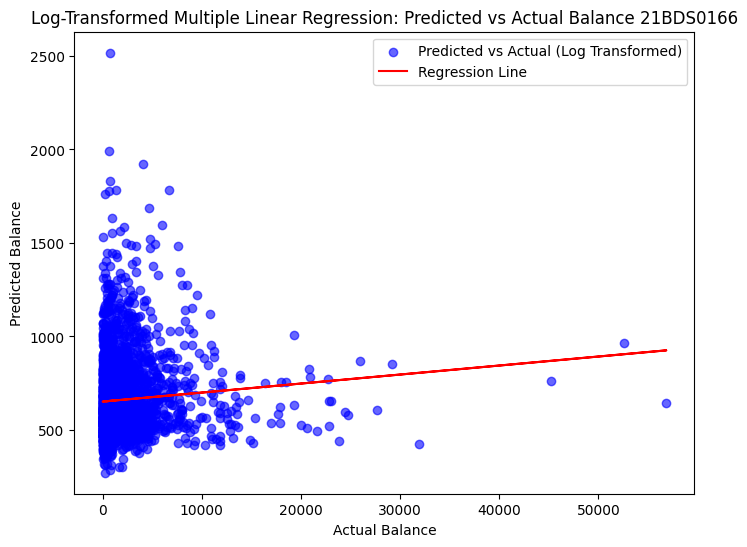

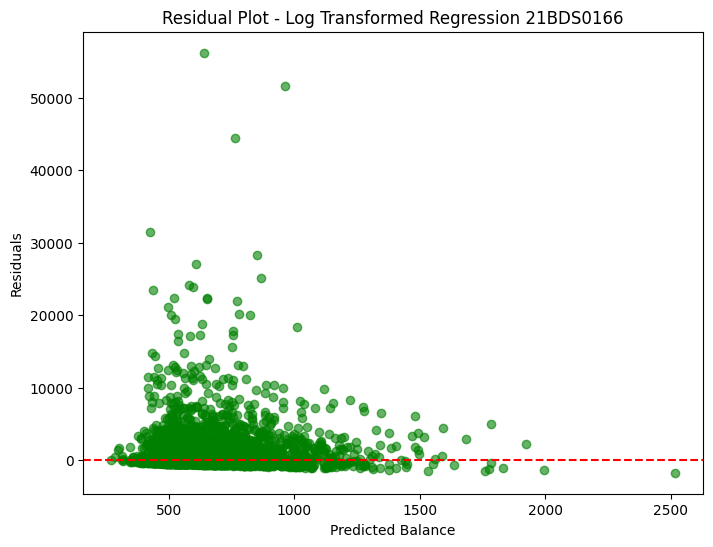

In [49]:
# using log transformation - Multiple Linear Regression
# Step 1: Filter out problematic values (balance <= 0)
df_filtered = df[df['balance'] > 0]

# Update the dependent variable and features after filtering
y = df_filtered['balance']
X = df_encoded.loc[df_filtered.index, numerical_cols]  # Filtered feature set

# Log Transform the Target Variable (balance)
y_log = np.log1p(y)  # Apply log1p safely

# Split the data
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.3, random_state=42)

# Step 2: Model Building with Log-Transformed Target
lr_log = LinearRegression()
lr_log.fit(X_train, y_train_log)

# Prediction with log transformation
y_pred_log = lr_log.predict(X_test)

# Inverse transformation to get original scale predictions
y_pred = np.expm1(y_pred_log)  # expm1 to reverse log1p transformation
y_test = np.expm1(y_test_log)

# Step 3: Model Evaluation
mse_log = mean_squared_error(y_test, y_pred)
r2_log = r2_score(y_test, y_pred)

# Adjusted R-squared calculation
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2_log = 1 - (1 - r2_log) * (n - 1) / (n - p - 1)

print(f"Log-Transformed MSE: {mse_log:.4f}")
print(f"Log-Transformed R-squared: {r2_log:.4f}")
print(f"Log-Transformed Adjusted R-squared: {adjusted_r2_log:.4f}")

# Step 4: Plotting Predicted vs Actual (Log Transformation)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual (Log Transformed)')

# Plotting the regression line
m, c = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + c, color='red', label='Regression Line')
plt.title('Log-Transformed Multiple Linear Regression: Predicted vs Actual Balance 21BDS0166')
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.legend()
plt.show()

# Step 5: Residual Plot
residuals_log = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals_log, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - Log Transformed Regression 21BDS0166')
plt.xlabel('Predicted Balance')
plt.ylabel('Residuals')
plt.show()